In [1]:
### Importing the packages to read the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df_wages = pd.read_csv('microwage.csv')
df_wages.head()

,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
0,42,6,5170,2601,74,19,0,0,11.99,0,0,0,0,0,1,0,0,10,1.01,92.857140
1,21,26,3720,2602,37,27,0,0,3.19,0,0,0,0,0,1,0,0,10,11.00,196.078430
2,42,6,680,3901,91,30,0,0,11.99,0,0,1,0,0,0,1,1,10,12.01,517.647095
3,42,6,6780,7802,219,21,1,0,13.35,0,0,0,1,0,0,0,0,10,1.65,490.196075
4,42,6,7470,6701,55,40,1,0,7.23,0,0,0,1,0,0,0,0,10,24.00,137.254913


In [3]:
regions = pd.read_csv('regions.csv')
industries = pd.read_csv('industries.csv')
fips = pd.read_csv('fips.csv')
metareas = pd.read_csv('metareas.csv')

In [4]:
regions.head()

,code,name
0,11,New England Division
1,12,Middle Atlantic Division
2,13,Mixed Northeast Divisions (1970 Metro)
3,21,East North Central Div.
4,22,West North Central Div.


In [5]:
df_merged = pd.merge(df_wages, regions, left_on='region', right_on='code', how='left')

In [6]:
df_merged.head()

,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,...,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage,code,name
0,42,6,5170,2601,74,19,0,0,11.99,0,...,0,0,1,0,0,10,1.01,92.857140,42,Pacific Division
1,21,26,3720,2602,37,27,0,0,3.19,0,...,0,0,1,0,0,10,11.00,196.078430,21,East North Central Div.
2,42,6,680,3901,91,30,0,0,11.99,0,...,0,0,0,1,1,10,12.01,517.647095,42,Pacific Division
3,42,6,6780,7802,219,21,1,0,13.35,0,...,1,0,0,0,0,10,1.65,490.196075,42,Pacific Division
4,42,6,7470,6701,55,40,1,0,7.23,0,...,1,0,0,0,0,10,24.00,137.254913,42,Pacific Division


In [7]:
df_merged.drop('code', axis=1, inplace=True)

In [8]:
df_merged.drop('region', axis=1, inplace=True)

In [9]:
df_merged.head()

,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage,name
0,6,5170,2601,74,19,0,0,11.99,0,0,0,0,0,1,0,0,10,1.01,92.857140,Pacific Division
1,26,3720,2602,37,27,0,0,3.19,0,0,0,0,0,1,0,0,10,11.00,196.078430,East North Central Div.
2,6,680,3901,91,30,0,0,11.99,0,0,1,0,0,0,1,1,10,12.01,517.647095,Pacific Division
3,6,6780,7802,219,21,1,0,13.35,0,0,0,1,0,0,0,0,10,1.65,490.196075,Pacific Division
4,6,7470,6701,55,40,1,0,7.23,0,0,0,1,0,0,0,0,10,24.00,137.254913,Pacific Division


In [10]:
df_merged.rename(columns={'name': 'region'}, inplace=True)

In [11]:
industries.head()

,code,name
0,0,N/A (not applicable)
1,10,"Agricultural production, crops"
2,11,"Agricultural production, livestock"
3,12,Veterinary services
4,20,Landscape and horticultural services


In [12]:
df_merged = pd.merge(df_merged, industries, left_on='industry', right_on='code', how='left')

In [13]:
df_merged.head()

,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,...,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage,region,code,name
0,6,5170,2601,74,19,0,0,11.99,0,0,...,0,1,0,0,10,1.01,92.857140,Pacific Division,10,"Agricultural production, crops"
1,26,3720,2602,37,27,0,0,3.19,0,0,...,0,1,0,0,10,11.00,196.078430,East North Central Div.,10,"Agricultural production, crops"
2,6,680,3901,91,30,0,0,11.99,0,0,...,0,0,1,1,10,12.01,517.647095,Pacific Division,10,"Agricultural production, crops"
3,6,6780,7802,219,21,1,0,13.35,0,0,...,0,0,0,0,10,1.65,490.196075,Pacific Division,10,"Agricultural production, crops"
4,6,7470,6701,55,40,1,0,7.23,0,0,...,0,0,0,0,10,24.00,137.254913,Pacific Division,10,"Agricultural production, crops"


In [14]:
df_merged.drop('code', axis=1, inplace=True)

In [15]:
df_merged.drop('industry', axis=1, inplace=True)

In [16]:
df_merged.rename(columns={'name': 'industry'}, inplace=True)

In [17]:
fips.head()

,code,name
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [18]:
df_merged = pd.merge(df_merged, fips, left_on='statefip', right_on='code', how='left')

In [19]:
df_merged.drop('code', axis=1, inplace=True)

In [20]:
df_merged.drop('statefip', axis=1, inplace=True)

In [21]:
df_merged.rename(columns={'name': 'statefip'}, inplace=True)

In [22]:
display(df_merged)

,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,expyrs,wkwage,region,industry,statefip
0,5170,2601,74,19,0,0,11.99,0,0,0,0,0,1,0,0,1.010000,92.857140,Pacific Division,"Agricultural production, crops",California
1,3720,2602,37,27,0,0,3.19,0,0,0,0,0,1,0,0,11.000000,196.078430,East North Central Div.,"Agricultural production, crops",Michigan
2,680,3901,91,30,0,0,11.99,0,0,1,0,0,0,1,1,12.010000,517.647095,Pacific Division,"Agricultural production, crops",California
3,6780,7802,219,21,1,0,13.35,0,0,0,1,0,0,0,0,1.650000,490.196075,Pacific Division,"Agricultural production, crops",California
4,7470,6701,55,40,1,0,7.23,0,0,0,1,0,0,0,0,24.000000,137.254913,Pacific Division,"Agricultural production, crops",California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349253,5600,4010,243,27,0,1,13.57,0,0,0,0,1,0,0,0,7.430000,242.424240,Middle Atlantic Division,National security and international affairs,New York
1349254,8840,1105,108,48,0,0,14.23,1,0,0,0,0,0,0,0,27.770000,2058.823486,South Atlantic Division,National security and international affairs,Maryland
1349255,1600,3203,92,23,0,0,14.23,0,1,0,0,0,0,0,0,2.770000,392.156860,East North Central Div.,National security and international affairs,Illinois
1349256,720,400,67,56,0,0,17.68,0,0,1,0,0,0,1,1,32.320000,613.725464,South Atlantic Division,National security and international affairs,Maryland


In [23]:
metareas.head()

,code,name
0,0,Not identifiable or not in an MSA
1,40,"Abilene, TX"
2,60,"Aguadilla, PR"
3,80,"Akron, OH"
4,120,"Albany, GA"


In [24]:
metareas['code'].value_counts()

code
0       1
5790    1
6020    1
6010    1
5990    1
       ..
2750    1
2720    1
2710    1
2700    1
9360    1
Name: count, Length: 378, dtype: int64

In [25]:
df_merged = pd.merge(df_merged, metareas, left_on='metaread', right_on='code', how='left')

In [26]:
df_merged.drop('code', axis=1, inplace=True)

In [27]:
df_merged.drop('metaread', axis=1, inplace=True)

In [28]:
df_merged.rename(columns={'name': 'metaread'}, inplace=True)

In [29]:
df_merged['puma'].value_counts()

puma
400     33986
200     31809
100     31640
300     30839
600     28651
        ...  
5601      329
608       327
2714      323
3518      270
3519      255
Name: count, Length: 630, dtype: int64

In [30]:
df_merged.isna().sum()

puma                 0
perwt                0
age                  0
female               0
race_nonwhite        0
edyrs                0
occ_managprof        0
occ_techsalad        0
occ_service          0
occ_farm             0
occ_product          0
occ_operator         0
occ_service_np       0
occ_service_broad    0
expyrs               0
wkwage               0
region               0
industry             0
statefip             0
metaread             0
dtype: int64

In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349258 entries, 0 to 1349257
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   puma               1349258 non-null  int64  
 1   perwt              1349258 non-null  int64  
 2   age                1349258 non-null  int64  
 3   female             1349258 non-null  int64  
 4   race_nonwhite      1349258 non-null  int64  
 5   edyrs              1349258 non-null  float64
 6   occ_managprof      1349258 non-null  int64  
 7   occ_techsalad      1349258 non-null  int64  
 8   occ_service        1349258 non-null  int64  
 9   occ_farm           1349258 non-null  int64  
 10  occ_product        1349258 non-null  int64  
 11  occ_operator       1349258 non-null  int64  
 12  occ_service_np     1349258 non-null  int64  
 13  occ_service_broad  1349258 non-null  int64  
 14  expyrs             1349258 non-null  float64
 15  wkwage             1349258 non-n

In [32]:
import pandas as pd

categorical_features = []
continuous_features = []

# Exclude the target feature 'wkwage'
features_to_check = [col for col in df_merged.columns if col != 'wkwage']

# Iterate over each column in the dataframe excluding the target feature
for column in features_to_check:
    unique_values = df_merged[column].nunique()
    
    # Check if the column data type is numeric and has more than 25 unique values
    if df_merged[column].dtype == 'object' or unique_values <= 25:
        categorical_features.append(column)
    else:
        continuous_features.append(column)

# Printing the target feature 'wkwage' along with the lists of categorical and continuous features
print("Target feature: wkwage")
print("Categorical features:", categorical_features)
print("Continuous features:", continuous_features)


Target feature: wkwage
Categorical features: ['female', 'race_nonwhite', 'occ_managprof', 'occ_techsalad', 'occ_service', 'occ_farm', 'occ_product', 'occ_operator', 'occ_service_np', 'occ_service_broad', 'region', 'industry', 'statefip', 'metaread']
Continuous features: ['puma', 'perwt', 'age', 'edyrs', 'expyrs']


In [33]:
import pandas as pd

total_records = df_merged.shape

# Count of duplicate records
duplicate_records = df_merged.duplicated().sum()

# Printing the total number of records and count of duplicate records
print("Total records:", total_records)
print("Duplicate records:", duplicate_records)


Total records: (1349258, 20)
Duplicate records: 185


In [34]:
for num in categorical_features:
    print("----------------------------------------")
    print("Running for Column: ", num)
    print("----------------------------------------")
    print(df_merged[num].value_counts())
    print('________________________________________')

----------------------------------------
Running for Column:  female
----------------------------------------
female
0    676050
1    673208
Name: count, dtype: int64
________________________________________
----------------------------------------
Running for Column:  race_nonwhite
----------------------------------------
race_nonwhite
0    1133079
1     216179
Name: count, dtype: int64
________________________________________
----------------------------------------
Running for Column:  occ_managprof
----------------------------------------
occ_managprof
0    919055
1    430203
Name: count, dtype: int64
________________________________________
----------------------------------------
Running for Column:  occ_techsalad
----------------------------------------
occ_techsalad
0    947061
1    402197
Name: count, dtype: int64
________________________________________
----------------------------------------
Running for Column:  occ_service
----------------------------------------
occ_servi

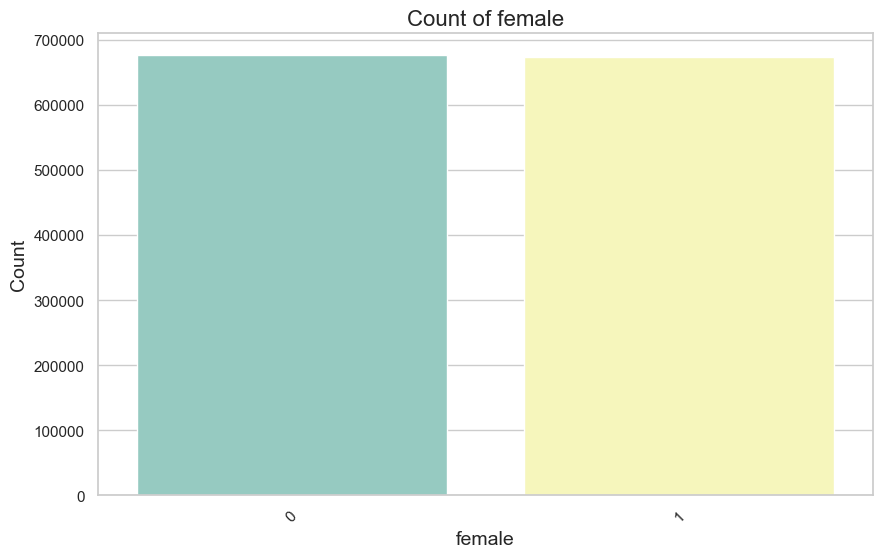

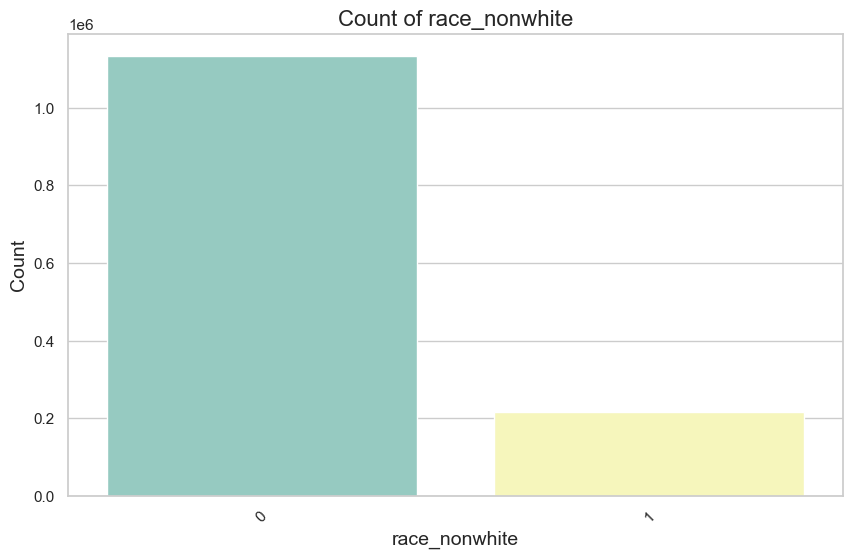

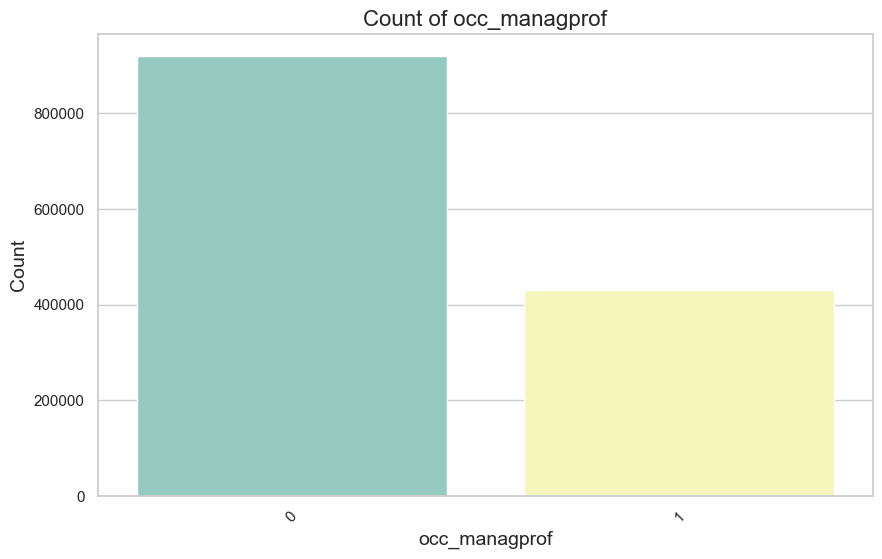

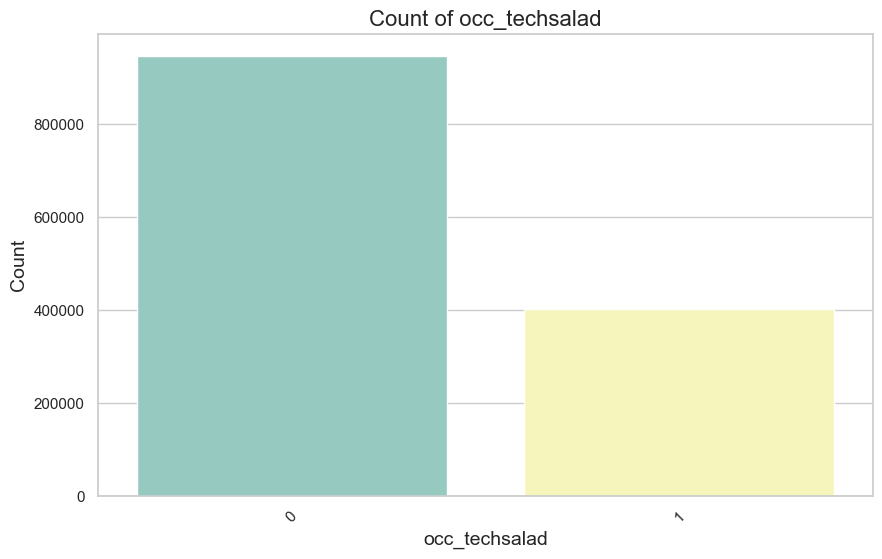

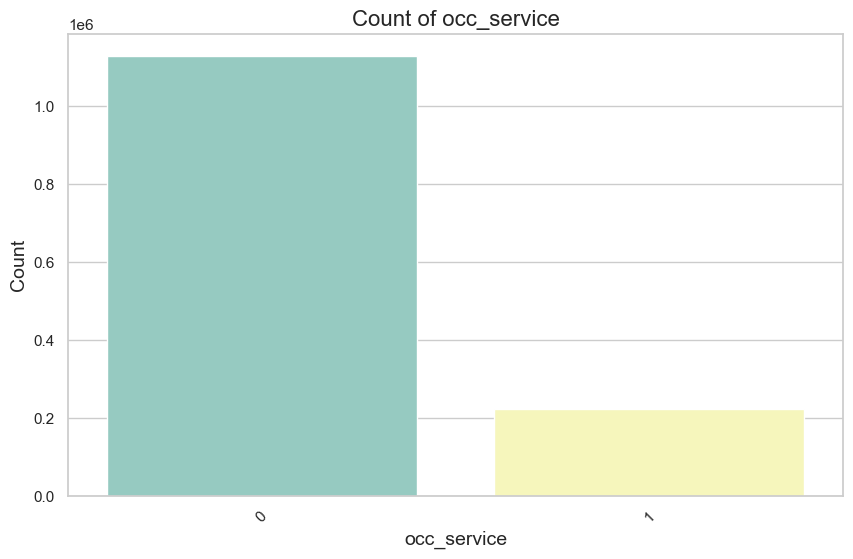

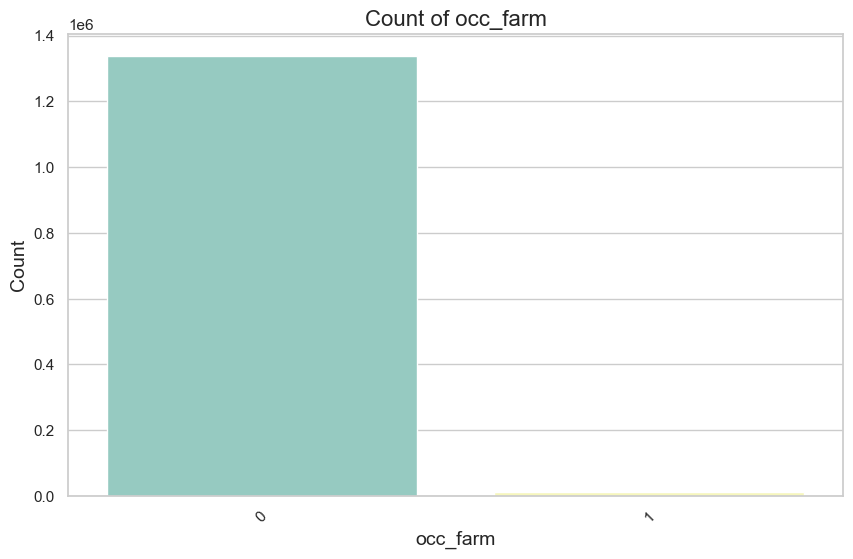

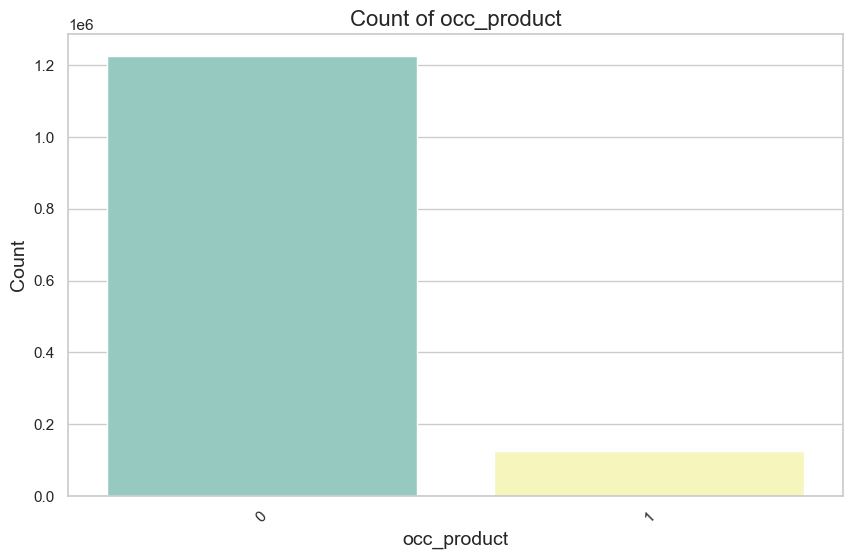

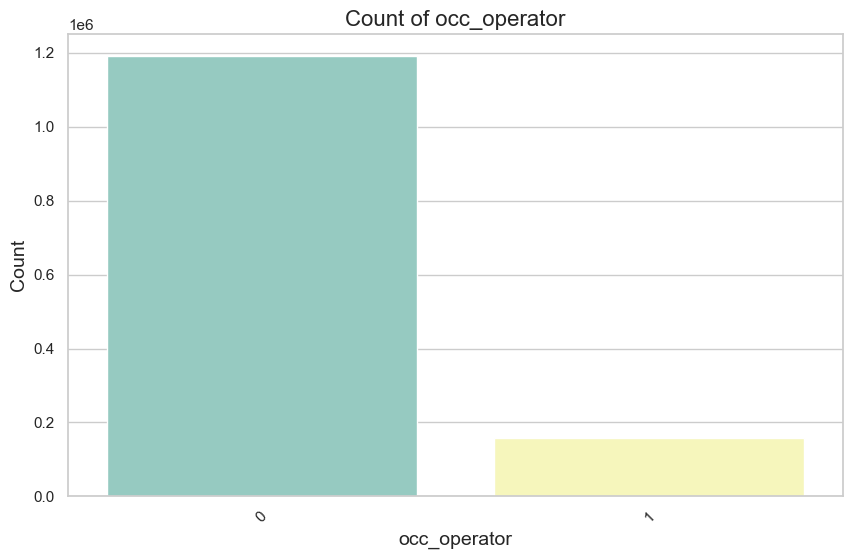

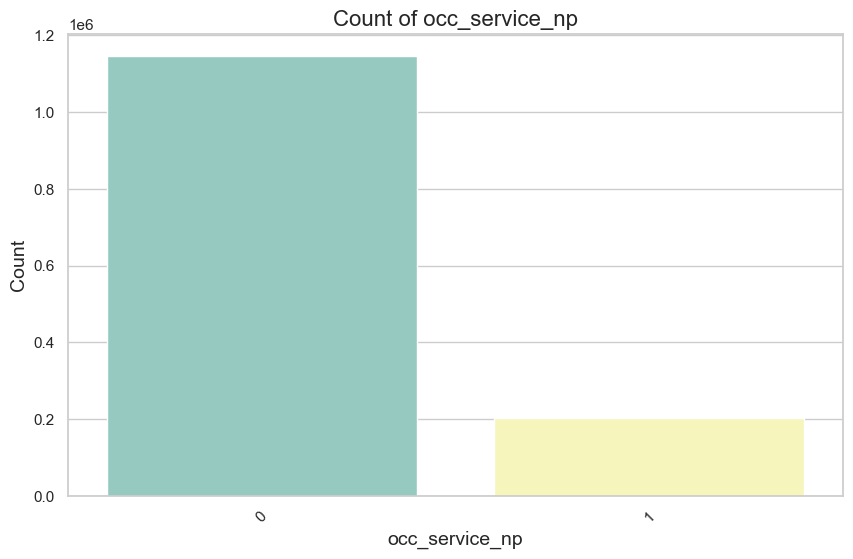

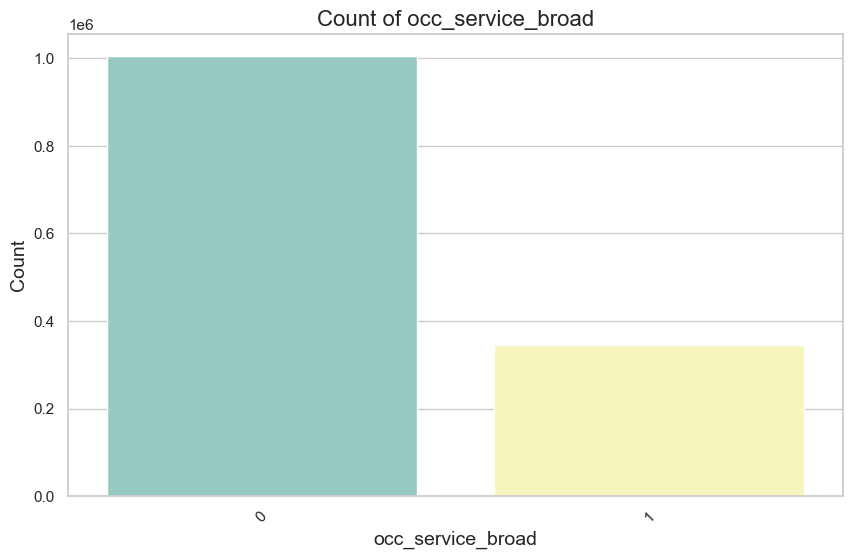

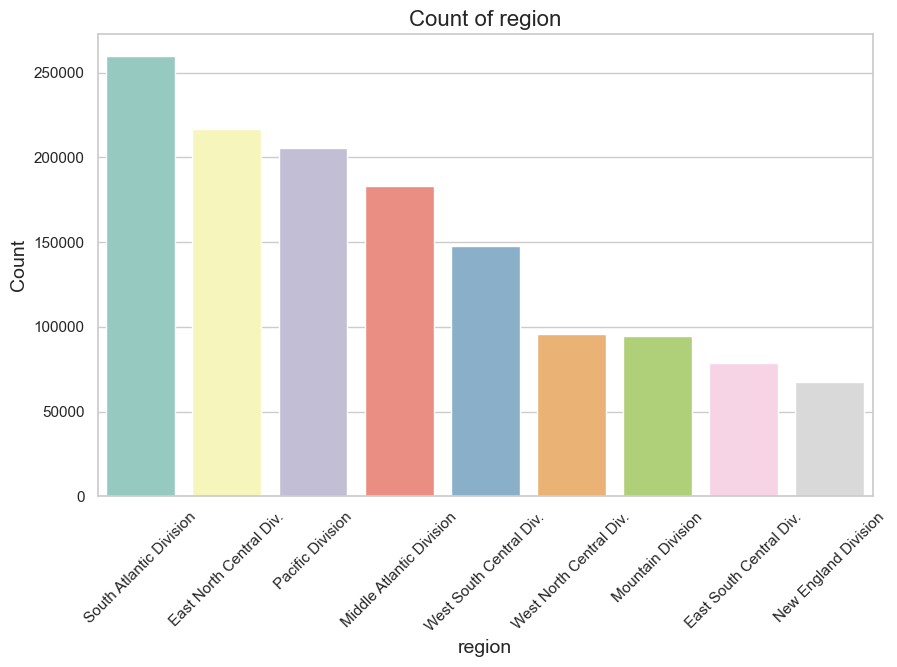

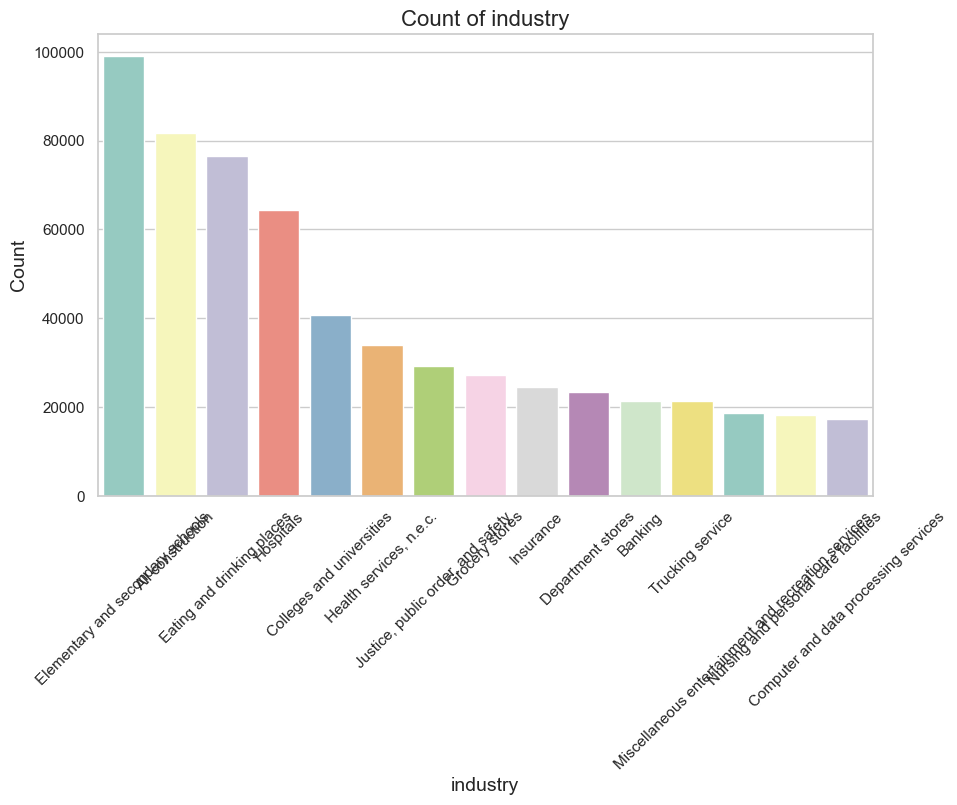

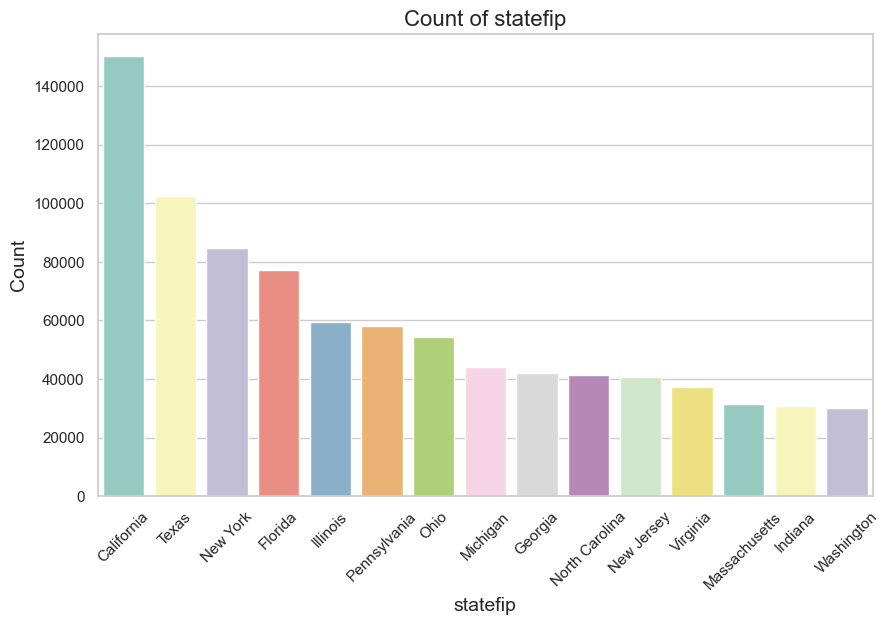

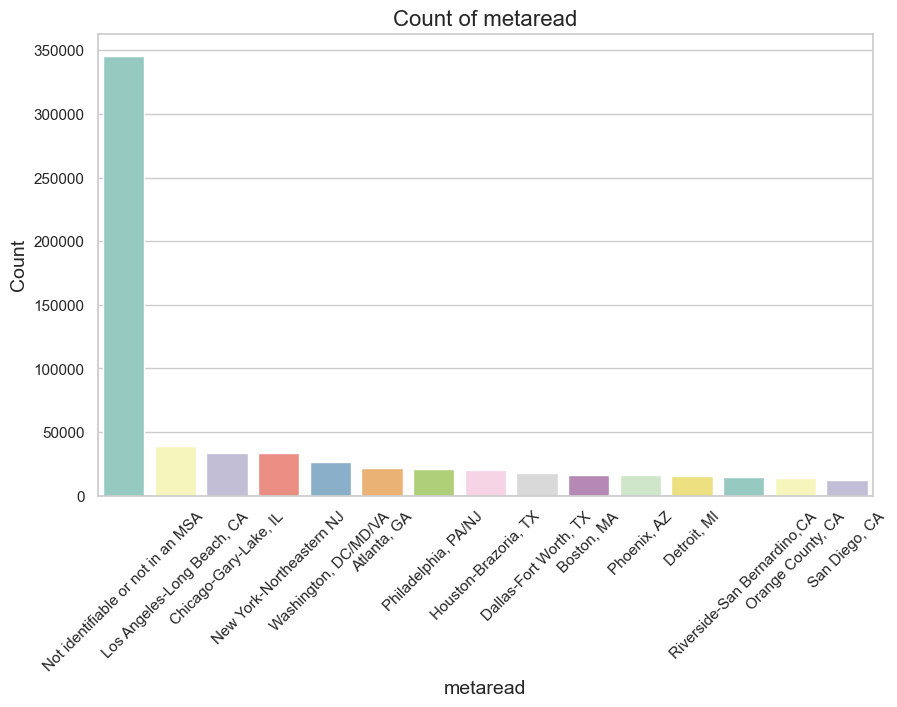

In [35]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each categorical feature and draw a bar plot
for feature in categorical_features:
    # Get the counts of unique values for the current feature
    value_counts = df_merged[feature].value_counts()
    
    # If there are more than 15 unique values, select only the top 15
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
    
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set3")  # Draw the bar plot
    plt.title(f"Count of {feature}", fontsize=16)  # Set the title
    plt.xlabel(feature, fontsize=14)  # Set the x-axis label
    plt.ylabel("Count", fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Show the plot


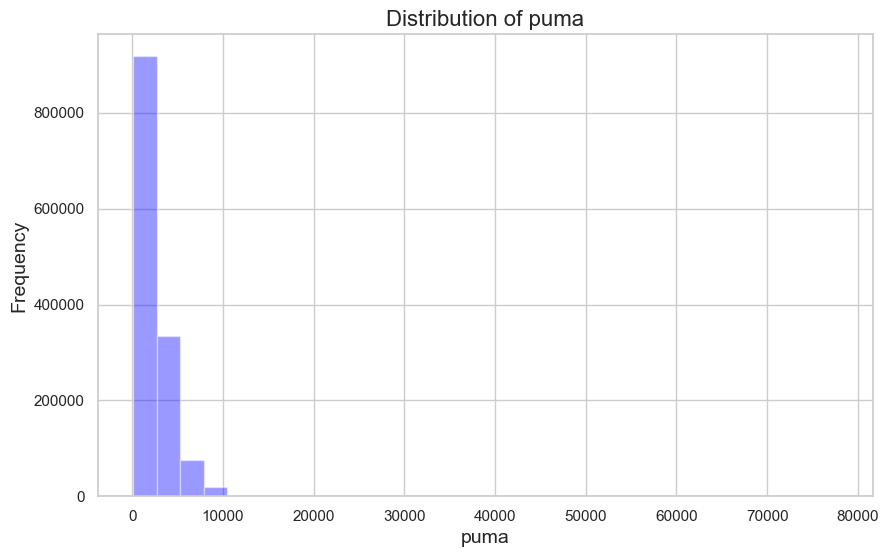

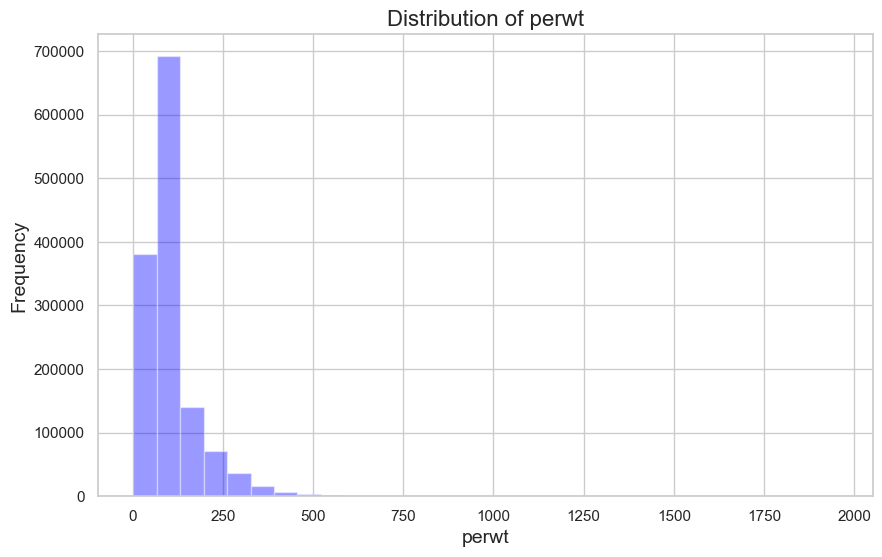

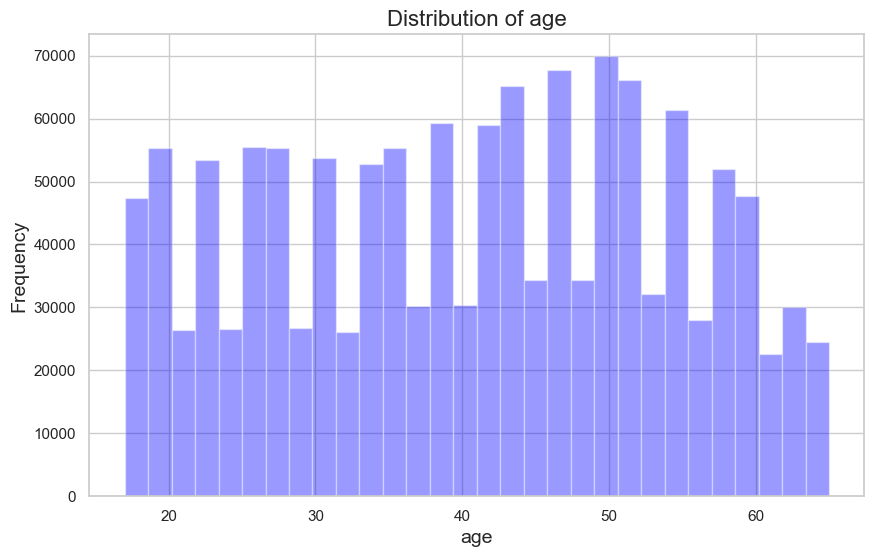

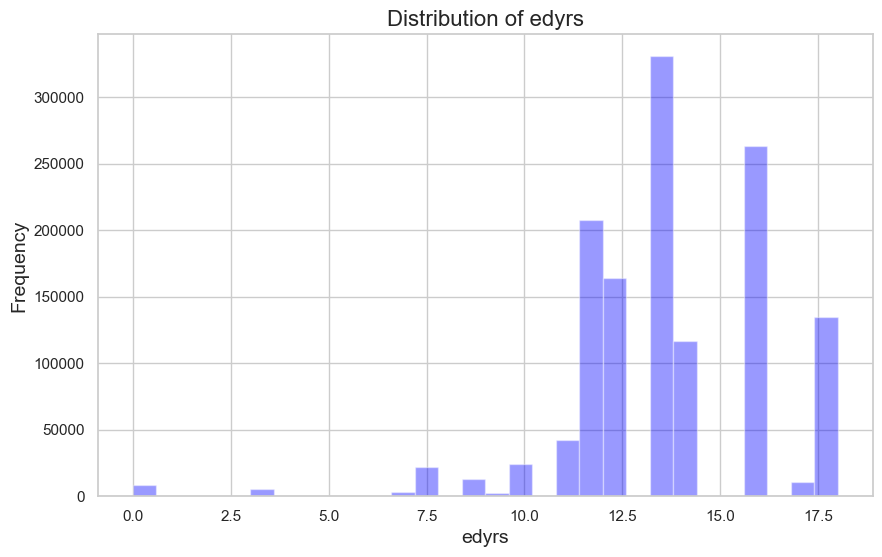

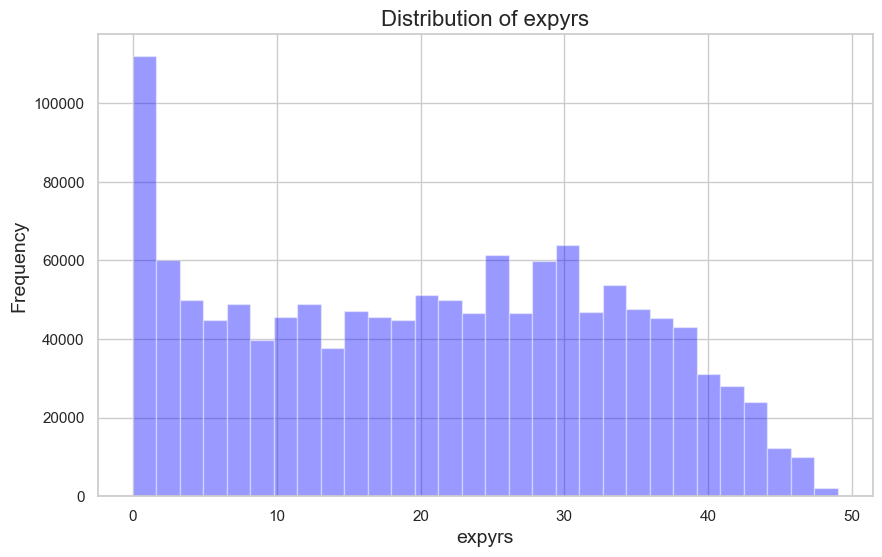

In [36]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each continuous feature and draw a distribution plot
for feature in continuous_features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.distplot(df_merged[feature], kde=False, color="blue", bins=30)  # Draw the distribution plot
    plt.title(f"Distribution of {feature}", fontsize=16)  # Set the title
    plt.xlabel(feature, fontsize=14)  # Set the x-axis label
    plt.ylabel("Frequency", fontsize=14)  # Set the y-axis label
    plt.show()  # Show the plot

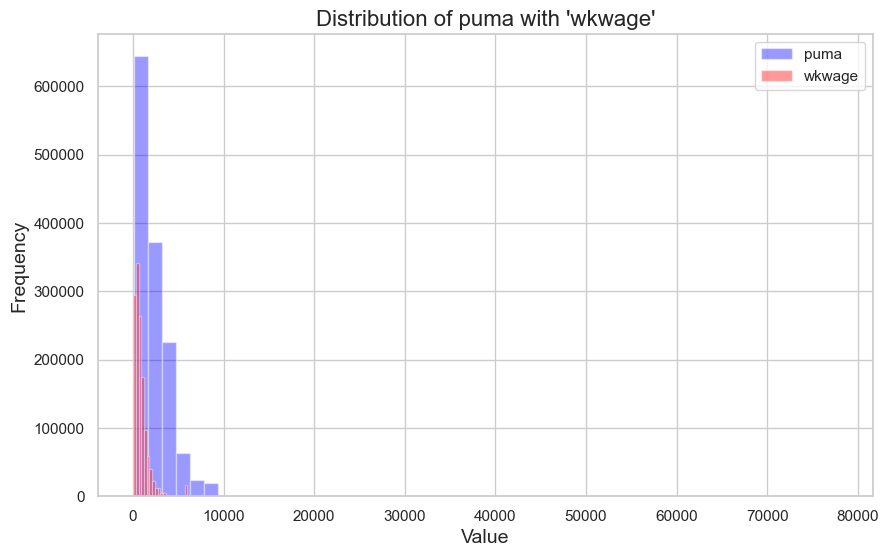

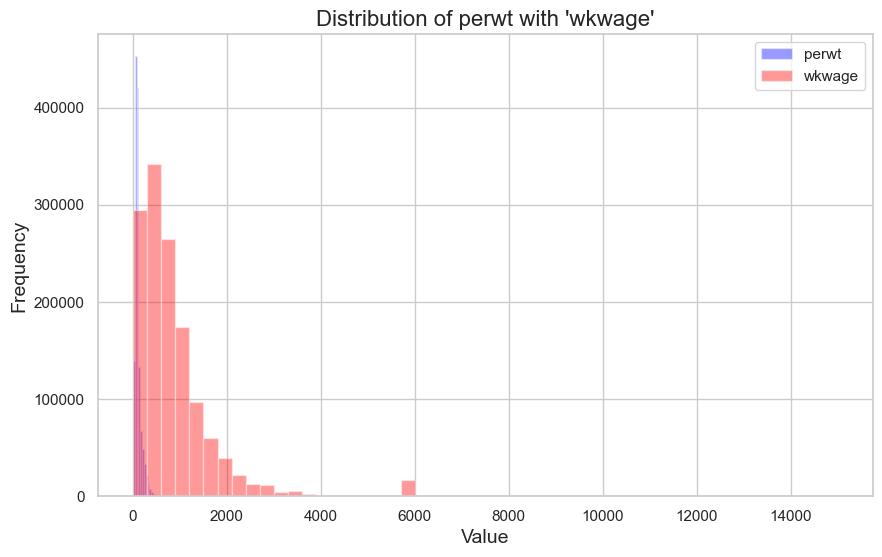

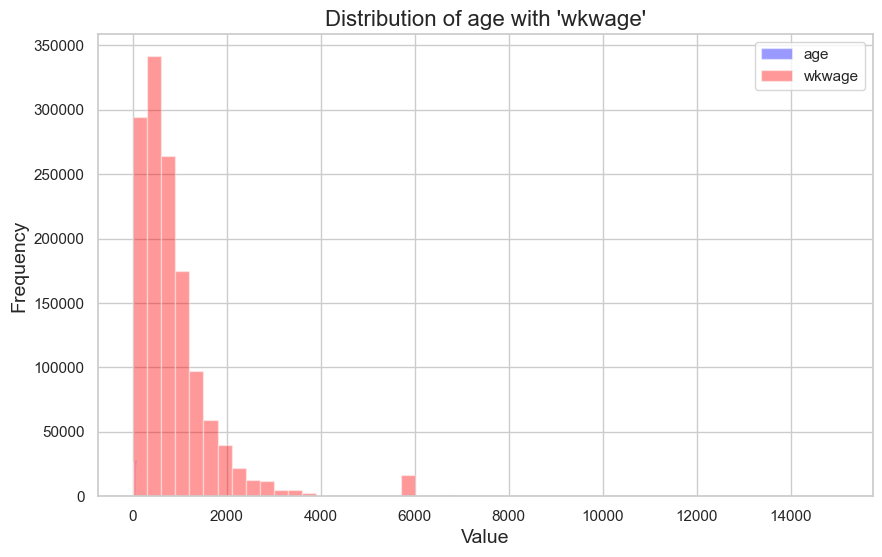

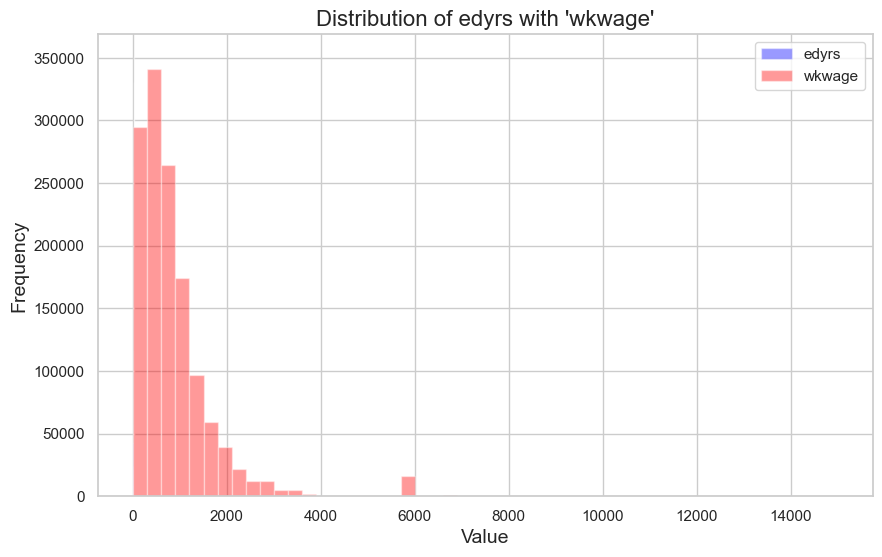

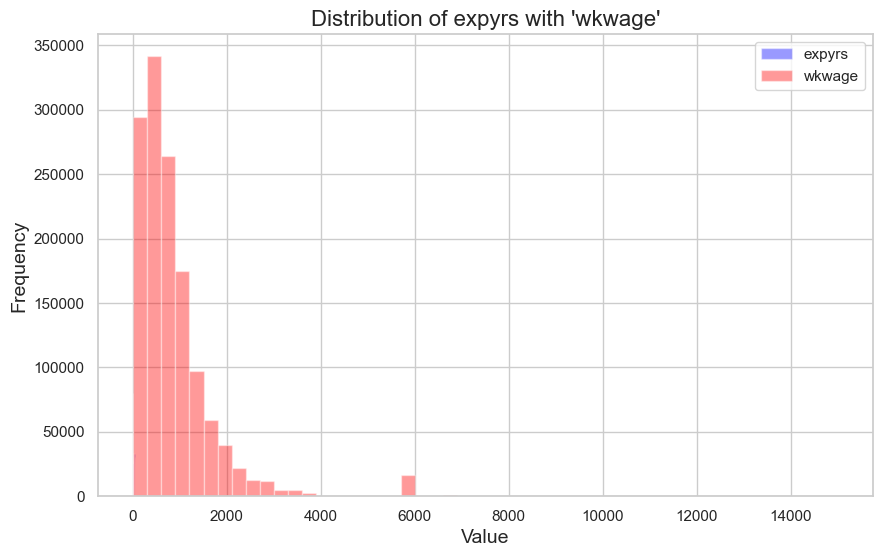

In [37]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each continuous feature and draw a distribution plot with the target feature
for feature in continuous_features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Draw the distribution plot for the current feature
    sns.distplot(df_merged[feature], kde=False, color="blue", label=feature)
    
    # Draw the distribution plot for the target feature
    sns.distplot(df_merged['wkwage'], kde=False, color="red", label='wkwage')
    
    plt.title(f"Distribution of {feature} with 'wkwage'", fontsize=16)  # Set the title
    plt.xlabel("Value", fontsize=14)  # Set the x-axis label
    plt.ylabel("Frequency", fontsize=14)  # Set the y-axis label
    plt.legend()  # Show legend
    plt.show()  # Show the plot

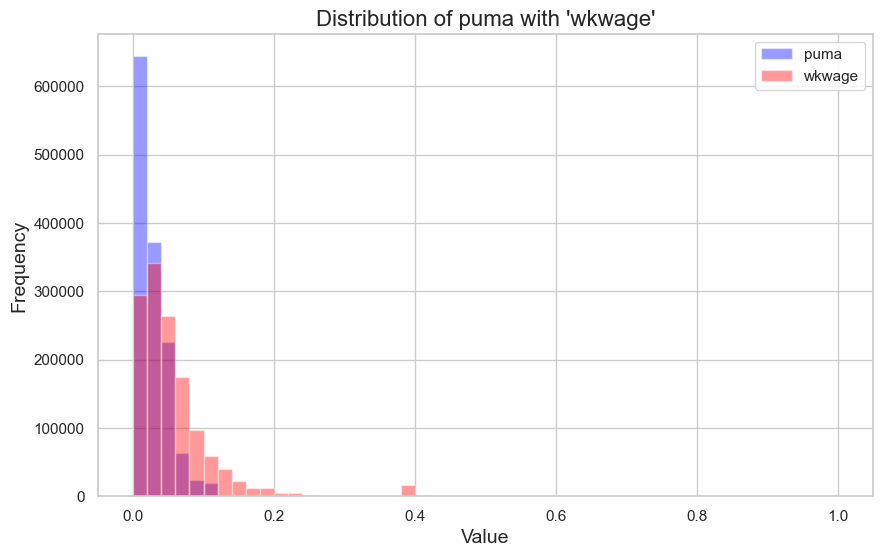

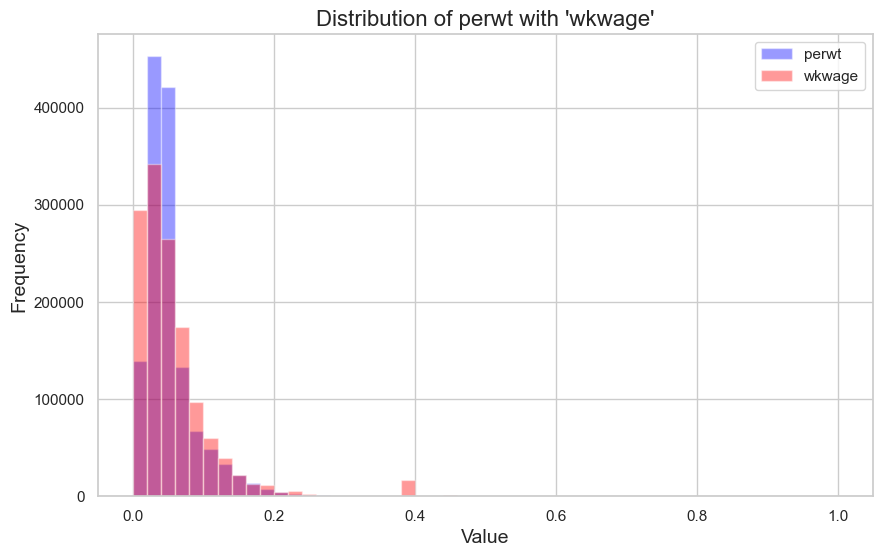

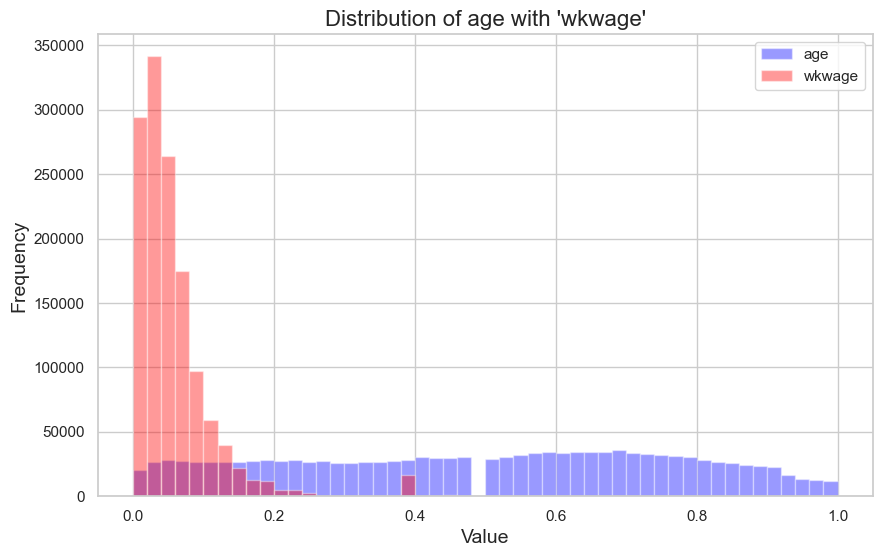

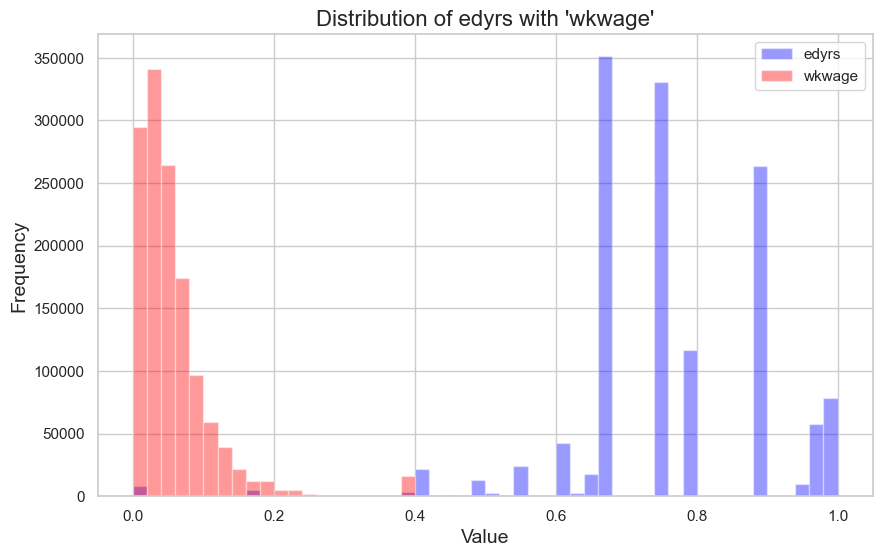

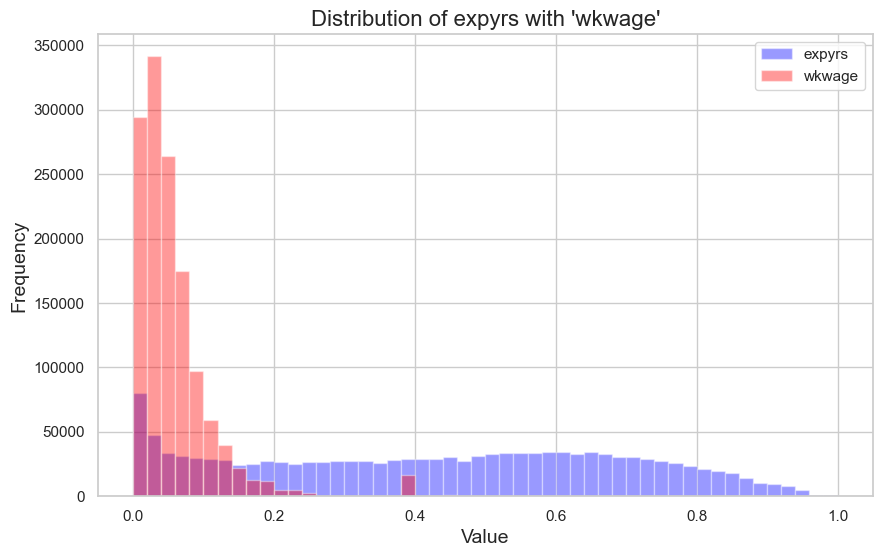

In [35]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize each continuous feature including the target feature
normalized_df = df_merged.copy()
normalized_df[continuous_features + ['wkwage']] = scaler.fit_transform(df_merged[continuous_features + ['wkwage']])

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each continuous feature and draw a distribution plot with the target feature
for feature in continuous_features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Draw the distribution plot for the current feature
    sns.distplot(normalized_df[feature], kde=False, color="blue", label=feature)
    
    # Draw the distribution plot for the target feature
    sns.distplot(normalized_df['wkwage'], kde=False, color="red", label='wkwage')
    
    plt.title(f"Distribution of {feature} with 'wkwage'", fontsize=16)  # Set the title
    plt.xlabel("Value", fontsize=14)  # Set the x-axis label
    plt.ylabel("Frequency", fontsize=14)  # Set the y-axis label
    plt.legend()  # Show legend
    plt.show()  # Show the plot

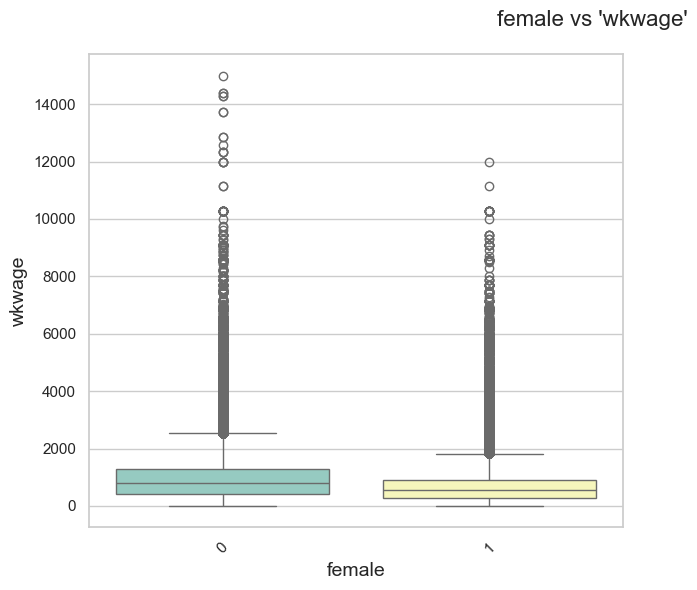

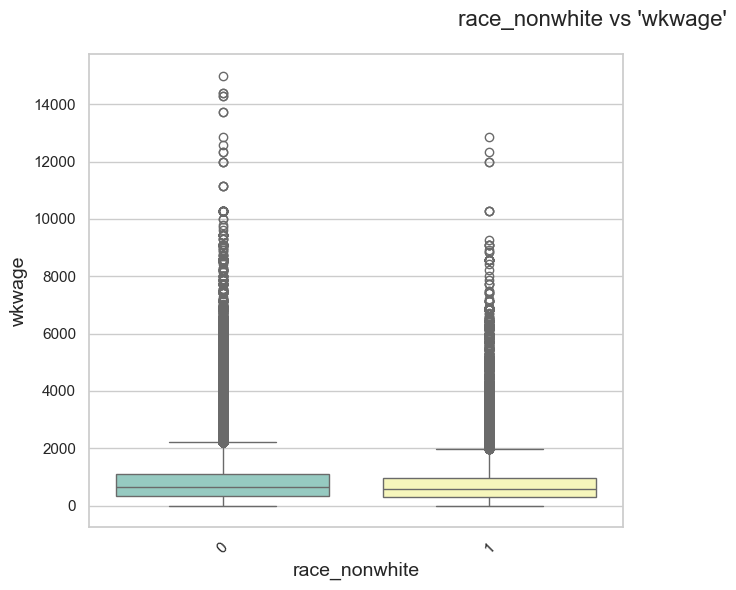

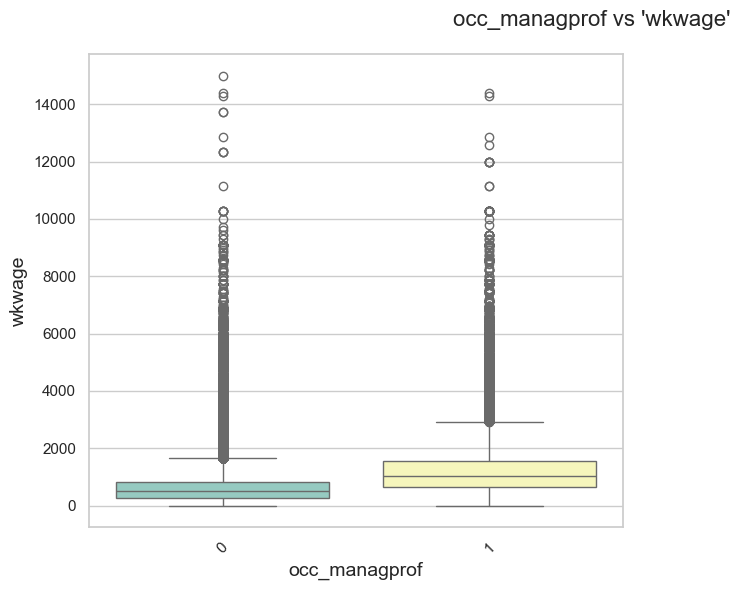

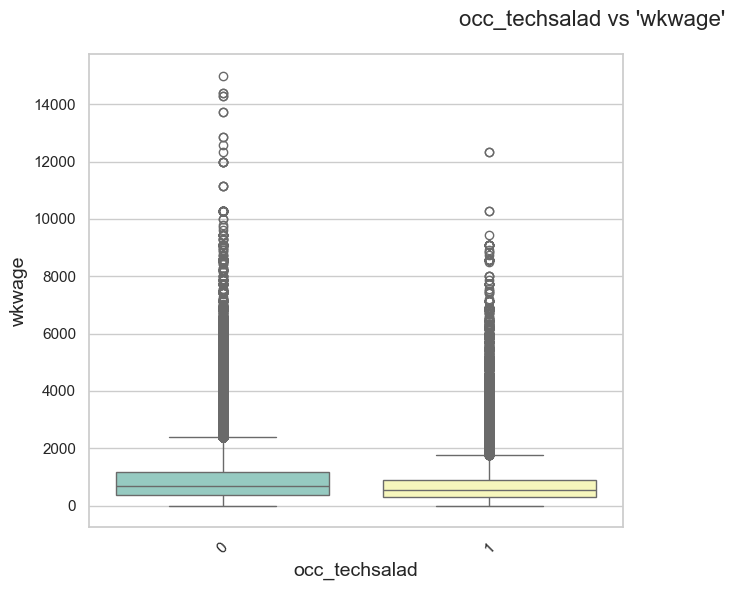

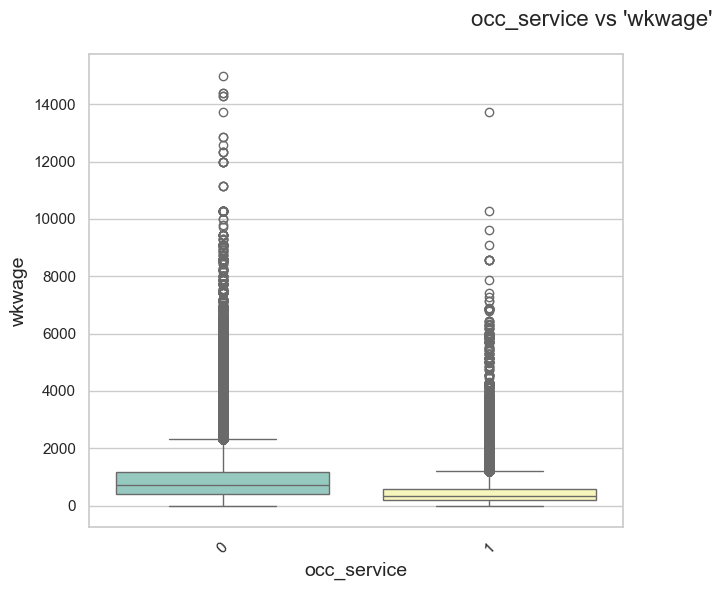

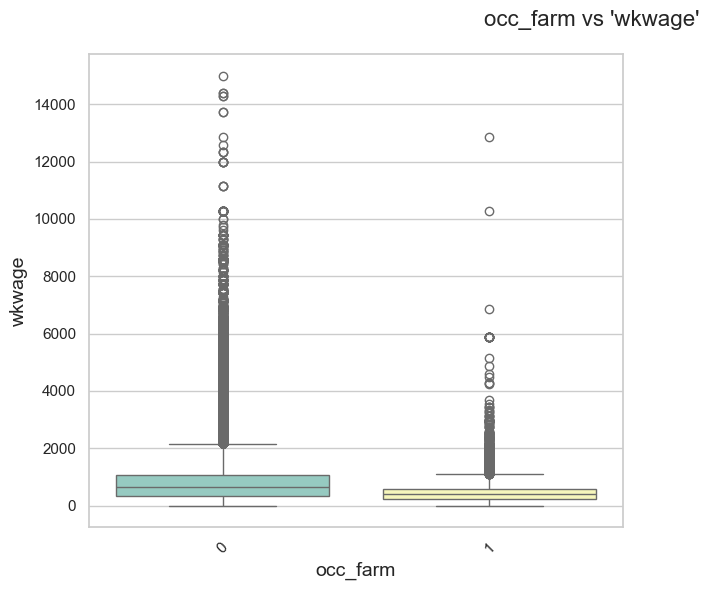

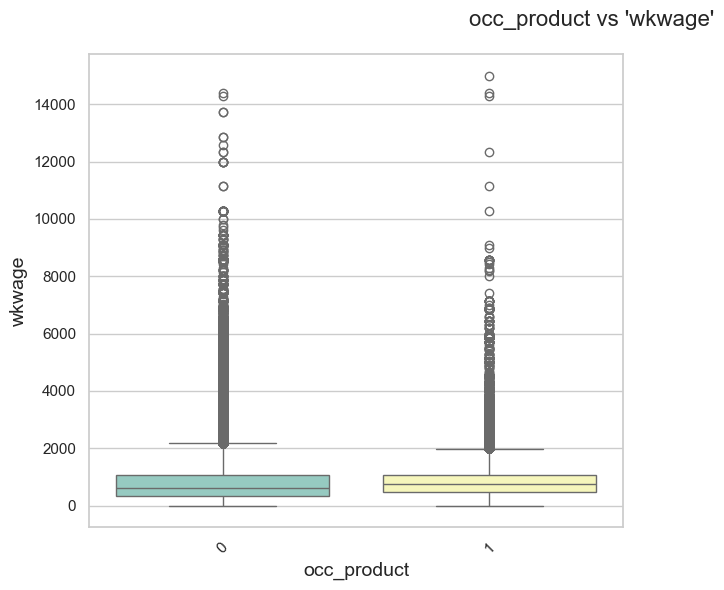

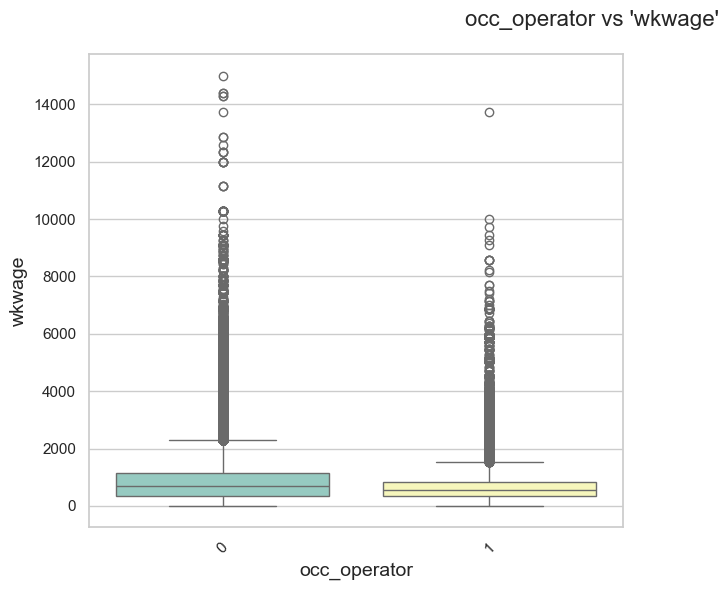

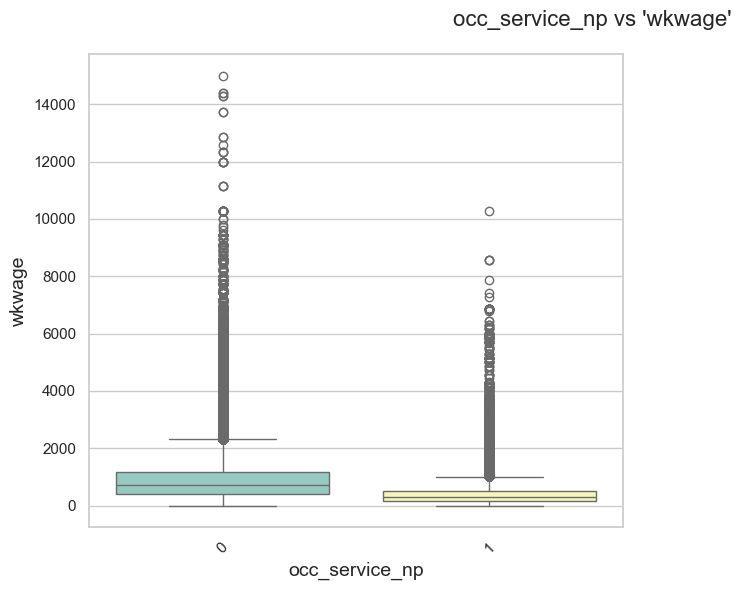

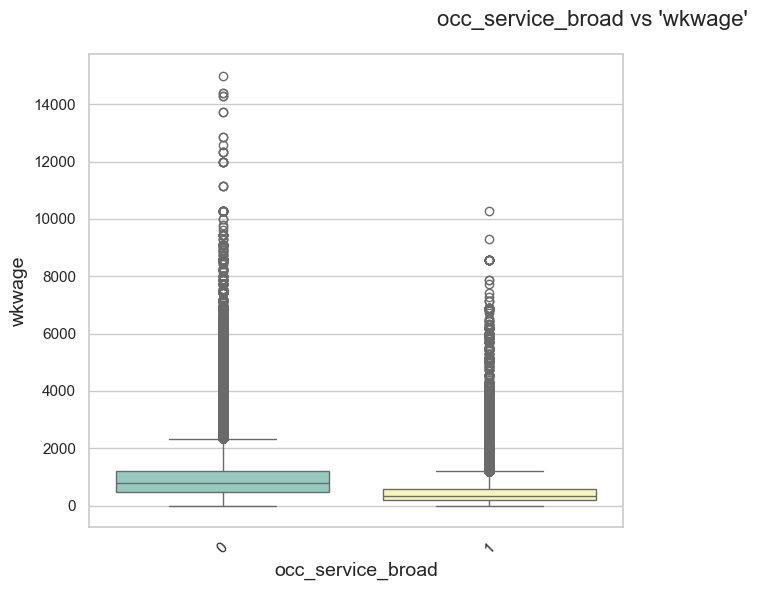

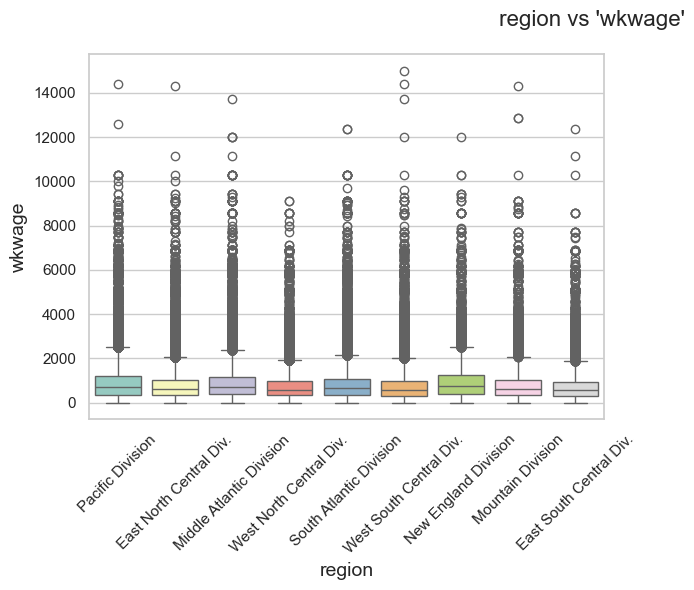

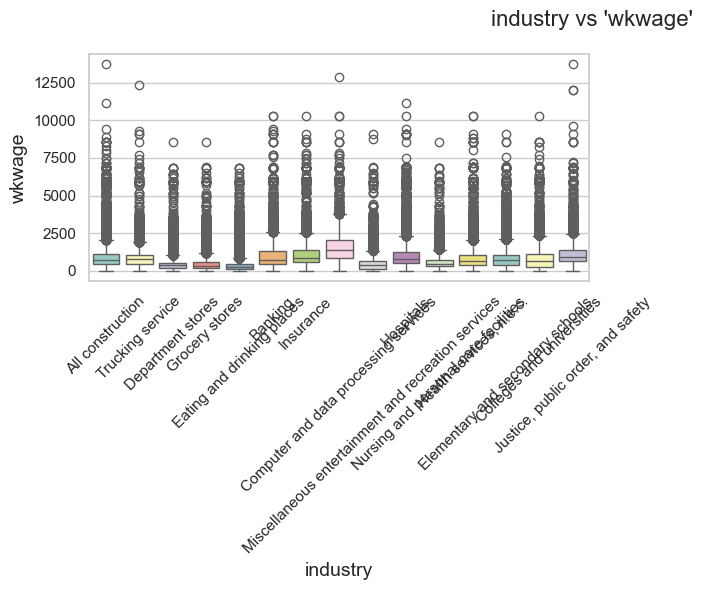

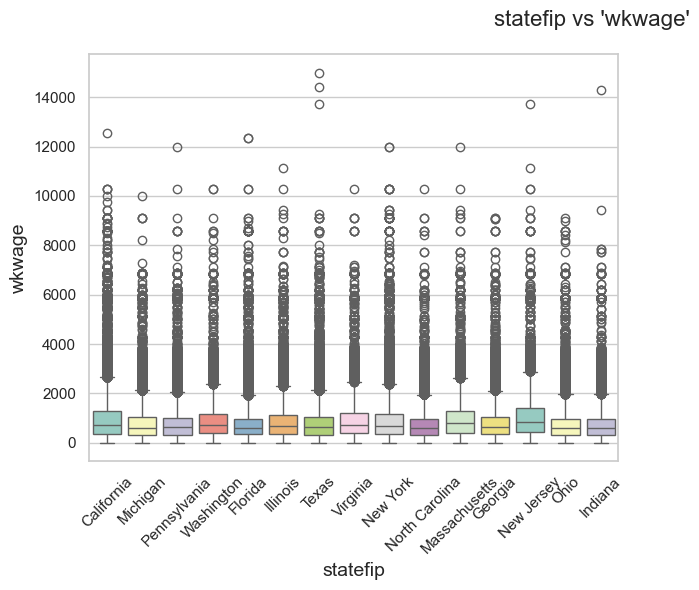

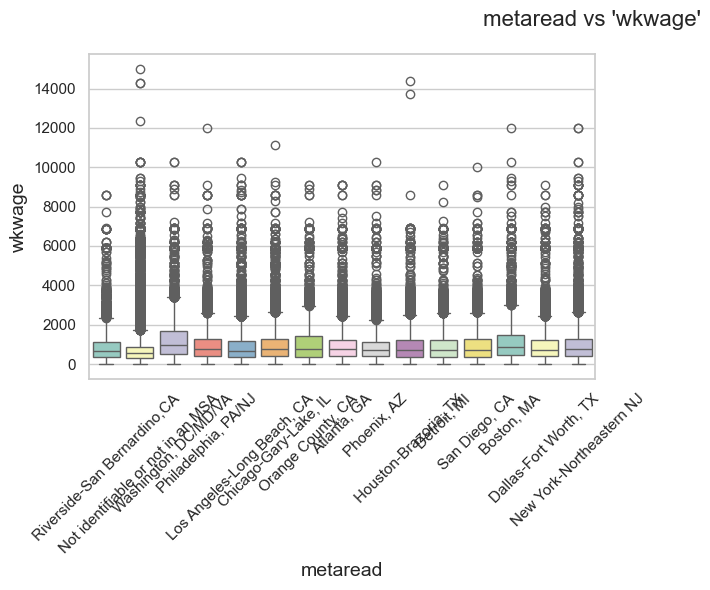

In [39]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each categorical feature and draw a box plot and violin plot
for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Set the figure size
    
    # Select only top 15 categories if there are more than 15 unique values
    top_categories = df_merged[feature].value_counts().head(15).index.tolist()
    df_top_categories = df_merged[df_merged[feature].isin(top_categories)]
    
    # Draw a box plot and violin plot to visualize the distribution of 'wkwage' within each category of the current feature
    sns.boxplot(x=feature, y='wkwage', data=df_top_categories, palette="Set3", ax=plt.subplot(1, 2, 1))  
    
    plt.suptitle(f"{feature} vs 'wkwage'", fontsize=16)  # Set the common title for subplots
    plt.xlabel(feature, fontsize=14)  # Set the x-axis label
    plt.ylabel("wkwage", fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot

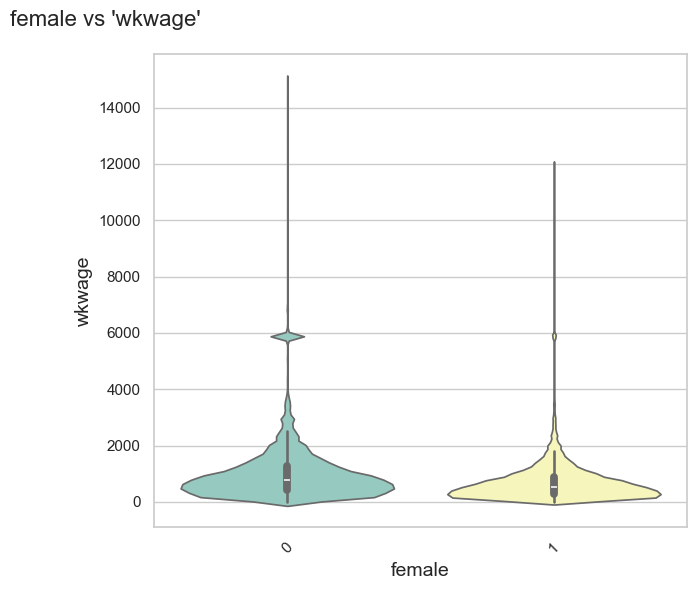

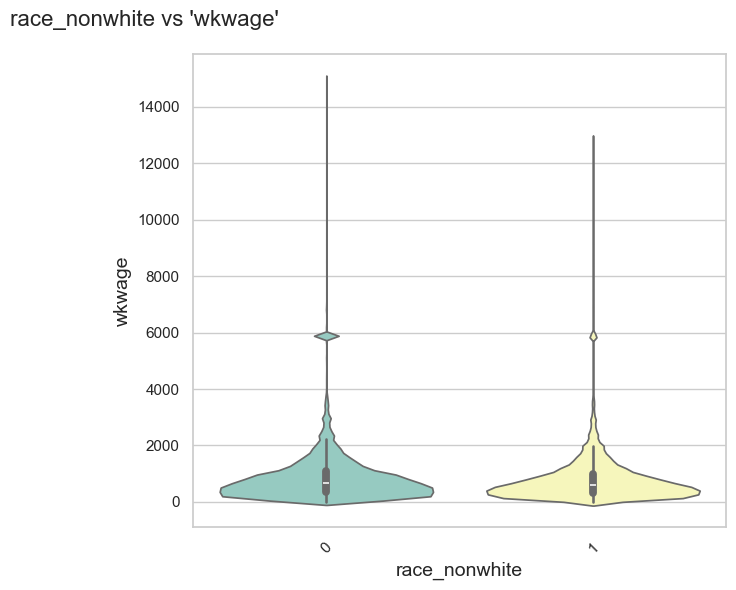

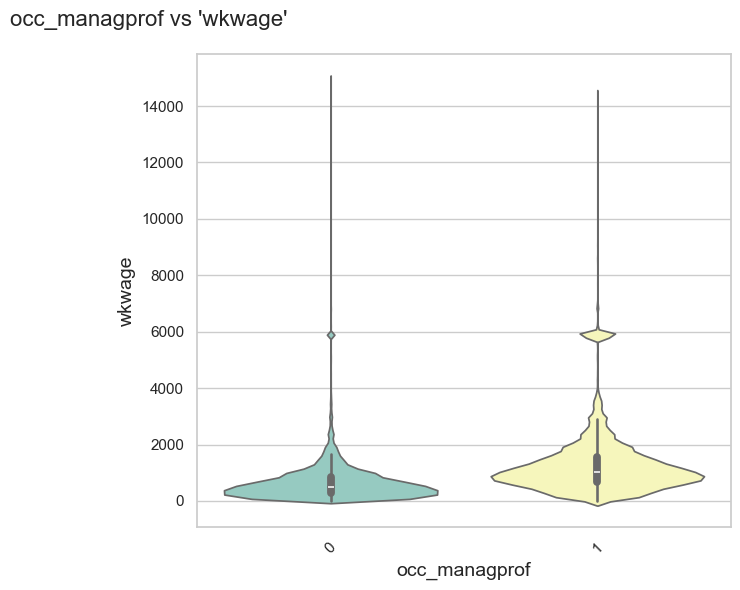

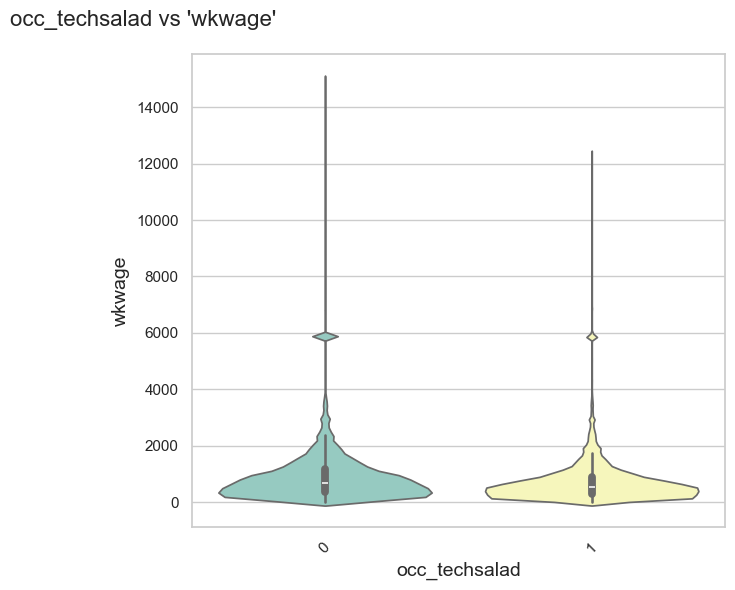

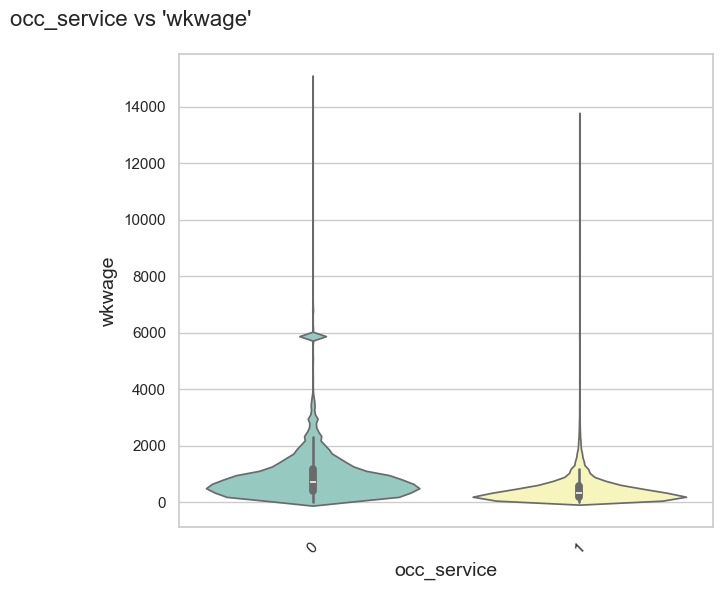

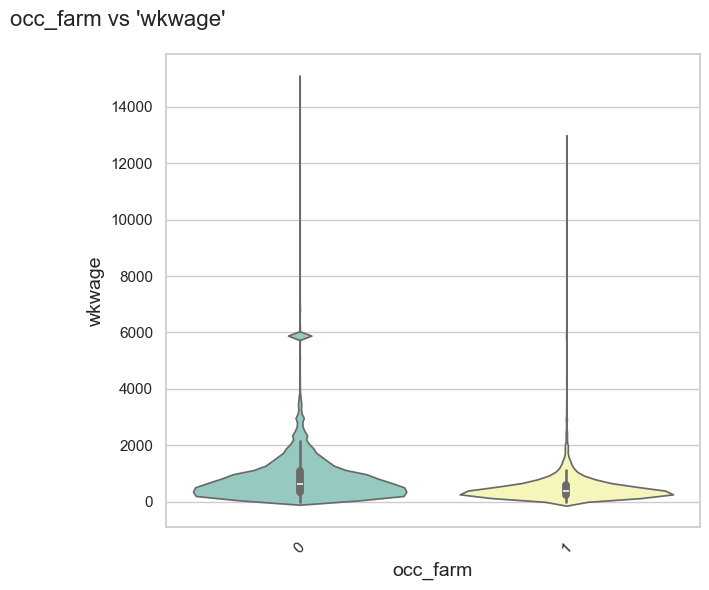

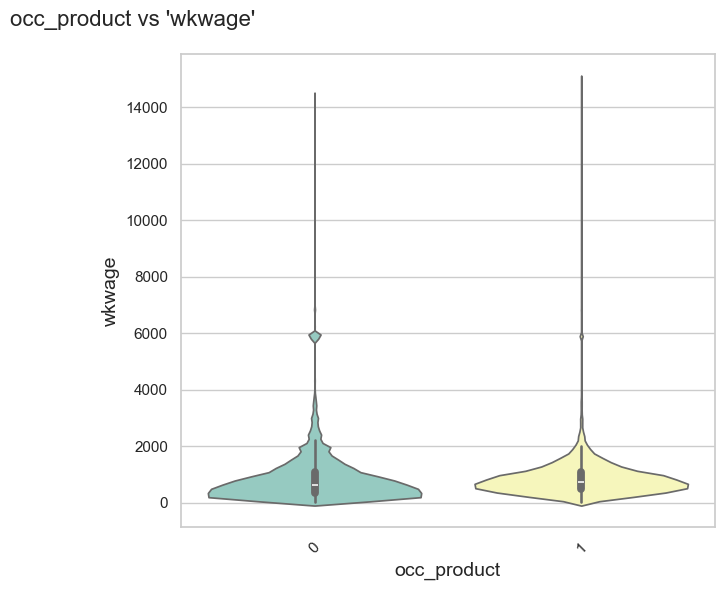

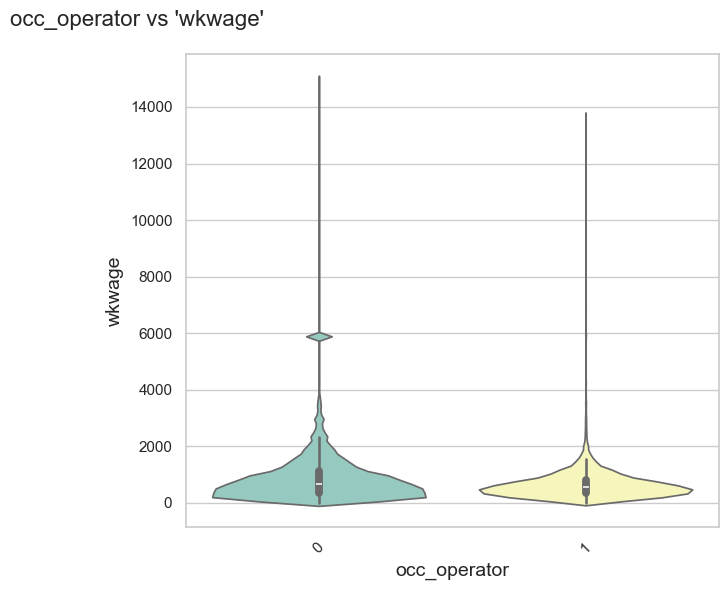

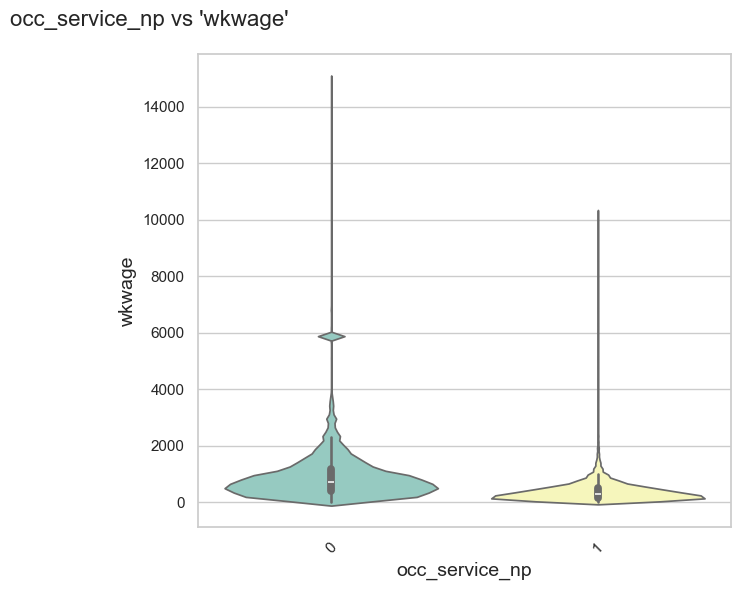

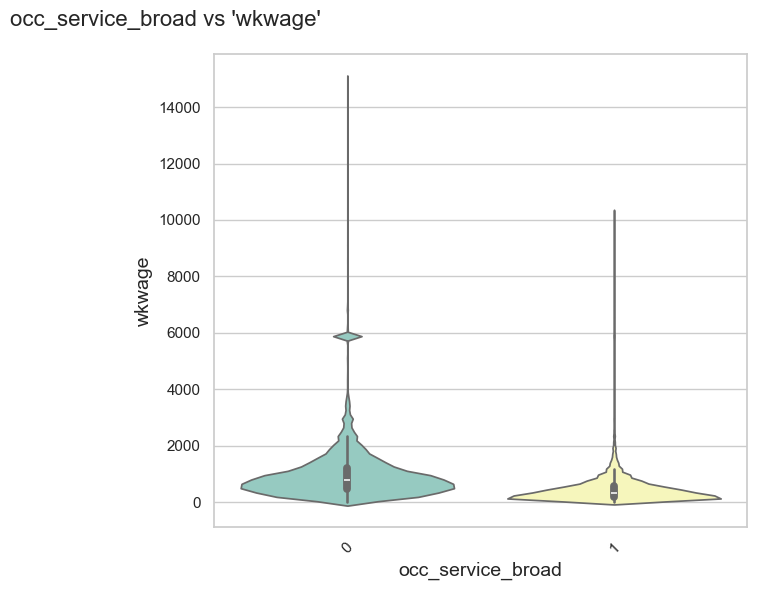

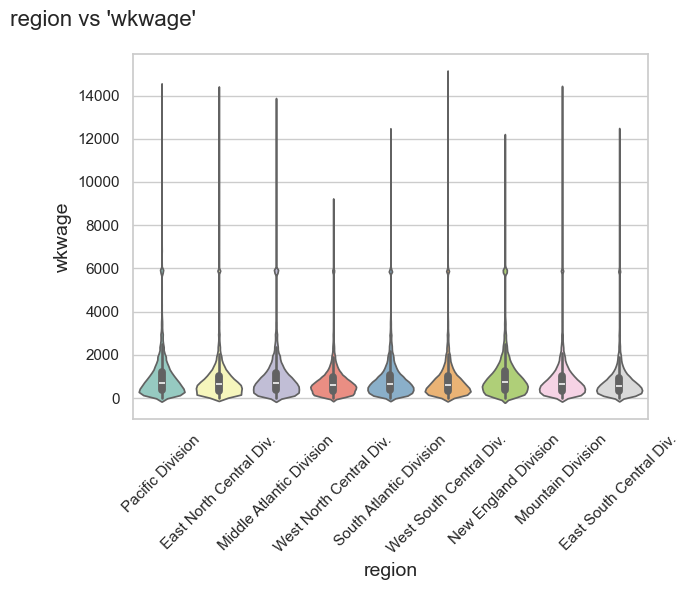

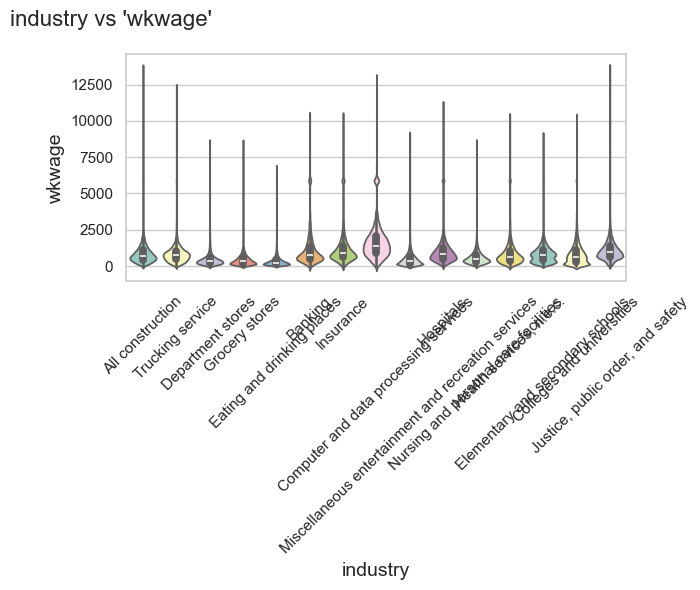

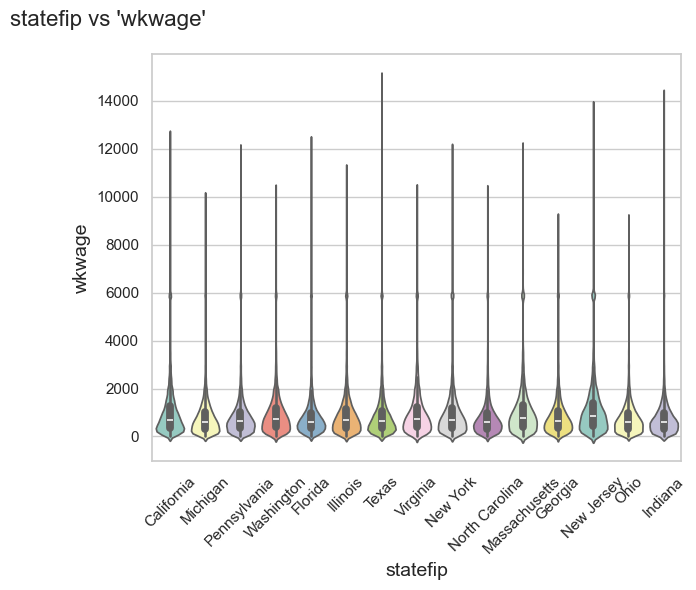

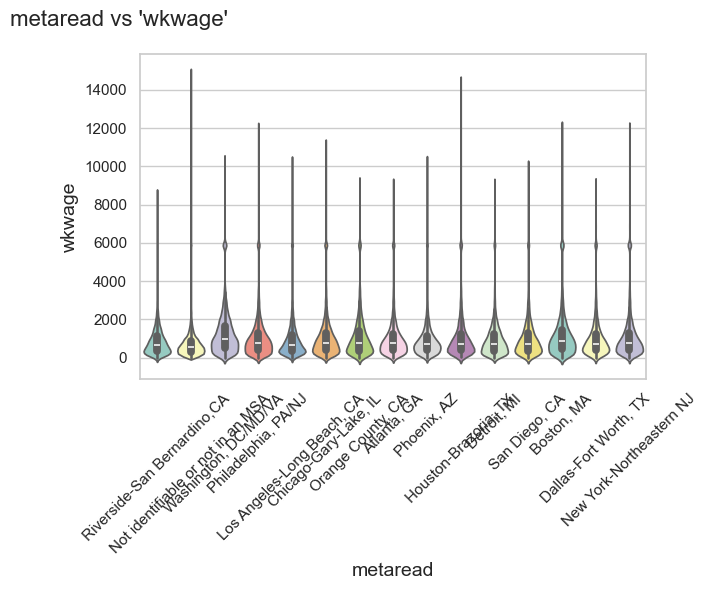

In [40]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each categorical feature and draw a box plot and violin plot
for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Set the figure size
    
    # Select only top 15 categories if there are more than 15 unique values
    top_categories = df_merged[feature].value_counts().head(15).index.tolist()
    df_top_categories = df_merged[df_merged[feature].isin(top_categories)]
    
    # Draw a box plot and violin plot to visualize the distribution of 'wkwage' within each category of the current feature
    #sns.boxplot(x=feature, y='wkwage', data=df_top_categories, palette="Set3", ax=plt.subplot(1, 2, 1))  
    sns.violinplot(x=feature, y='wkwage', data=df_top_categories, palette="Set3", ax=plt.subplot(1, 2, 2))
    
    plt.suptitle(f"{feature} vs 'wkwage'", fontsize=16)  # Set the common title for subplots
    plt.xlabel(feature, fontsize=14)  # Set the x-axis label
    plt.ylabel("wkwage", fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot

In [36]:
filtered_data = df_merged.copy()

In [37]:
# label encoder -hypothesis 1
label_encoder = LabelEncoder()
for column in categorical_features:
    filtered_data[column] = label_encoder.fit_transform(filtered_data[column])

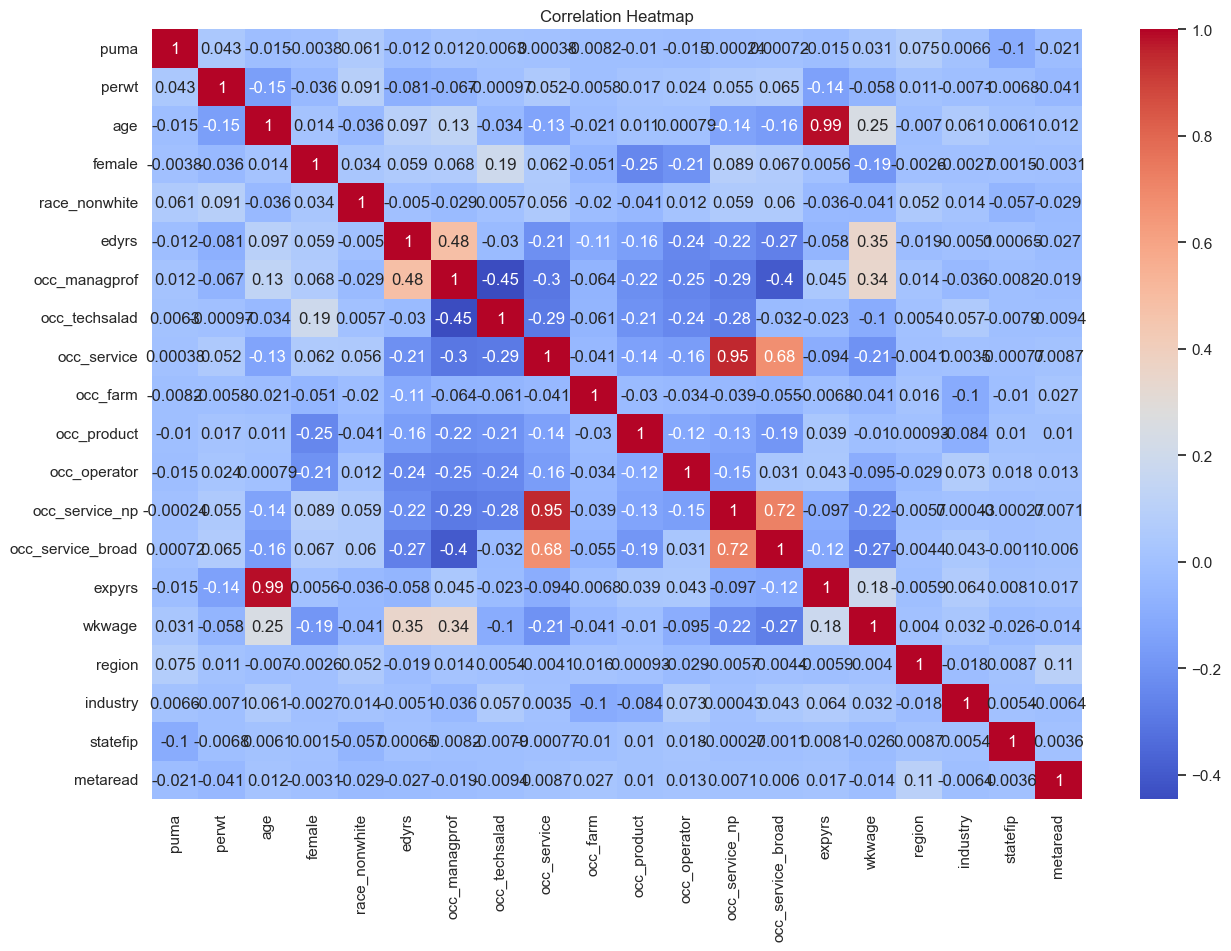

In [43]:
# Correlation Heatmap 
plt.figure(figsize=(15, 10)) 

corr_matrix = filtered_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

In [52]:
## Feature Selection---hypothesis 2
from sklearn.model_selection import train_test_split

In [53]:
df_train,df_test=train_test_split(filtered_data,test_size=0.30,random_state=100)

In [102]:
y_train=df_train.pop('wkwage')
x_train=df_train

In [103]:
import statsmodels.api as sm

# Reset indices for X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Add constant to X_train
X_train_lm = sm.add_constant(X_train)

# Fit the OLS model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Print the parameters
print(lr_1.params)

const                729.935550
puma                  -0.000311
perwt                 -0.012732
age                    1.137634
female                 0.636840
race_nonwhite         -1.125175
edyrs                 -0.627187
occ_managprof        116.433131
occ_techsalad        121.620492
occ_service          129.612985
occ_farm             120.214169
occ_product          119.950614
occ_operator         122.104160
occ_service_np        -9.514969
occ_service_broad      3.438508
expyrs                -1.193692
region                 0.209529
industry               0.007107
statefip               0.023518
metaread               0.001625
dtype: float64


In [104]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7855
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.720
Time:                        02:05:09   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944461   BIC:                         1.547e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               729.9356     11.82

In [105]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('metaread',axis=1)

In [106]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8307
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.658
Time:                        02:05:30   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944462   BIC:                         1.547e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               730.1847     11.67

In [107]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('female',axis=1)

In [108]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8759
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.598
Time:                        02:06:51   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944463   BIC:                         1.547e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               730.5324     11.62

In [109]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('statefip',axis=1)

In [110]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9242
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.536
Time:                        02:07:26   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944464   BIC:                         1.547e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               731.1280     11.52

In [111]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('industry',axis=1)

In [112]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9756
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.475
Time:                        02:07:56   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944465   BIC:                         1.547e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               731.6144     11.47

In [113]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('race_nonwhite',axis=1)

In [114]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.034
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.414
Time:                        02:08:30   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944466   BIC:                         1.547e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               731.6710     11.47

In [115]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('region',axis=1)

In [116]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.090
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.364
Time:                        02:09:23   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944467   BIC:                         1.547e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               732.3442     11.41

In [117]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('edyrs',axis=1)

In [118]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.151
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.316
Time:                        02:09:57   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944468   BIC:                         1.547e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               736.8455      9.00

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,age,55.79
11,expyrs,54.69
3,occ_managprof,51.79
4,occ_techsalad,41.38
5,occ_service,35.20
8,occ_operator,15.29
7,occ_product,12.36
9,occ_service_np,12.15
10,occ_service_broad,2.47
6,occ_farm,1.97


In [122]:
X=X.drop('age',axis=1)

In [123]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.201
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.284
Time:                        02:12:44   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944469   BIC:                         1.547e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               743.7990      2.69

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,occ_service,13.30
8,occ_service_np,12.11
3,occ_techsalad,3.00
2,occ_managprof,2.91
9,occ_service_broad,2.46
7,occ_operator,1.93
6,occ_product,1.61
5,occ_farm,1.05
10,expyrs,1.04
1,perwt,1.03


In [125]:
X=X.drop('occ_service',axis=1)

In [126]:
# Add constant to X_train
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wkwage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.201
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.284
Time:                        02:13:31   Log-Likelihood:            -7.7362e+06
No. Observations:              944480   AIC:                         1.547e+07
Df Residuals:                  944469   BIC:                         1.547e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               875.8746      8.08

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,occ_service_np,3.80
9,expyrs,3.49
8,occ_service_broad,3.30
1,perwt,2.97
3,occ_techsalad,2.87
2,occ_managprof,2.77
6,occ_operator,1.87
0,puma,1.83
5,occ_product,1.57
4,occ_farm,1.04


In [133]:
vif.reset_index(drop='index',inplace=True)

In [134]:
vif

,Features,VIF
0,occ_service_np,3.80
1,expyrs,3.49
2,occ_service_broad,3.30
3,perwt,2.97
4,occ_techsalad,2.87
5,occ_managprof,2.77
6,occ_operator,1.87
7,puma,1.83
8,occ_product,1.57
9,occ_farm,1.04


In [39]:
a=['occ_service_np','expyrs','occ_service_broad','perwt','occ_techsalad','occ_managprof','occ_operator','puma',
  'occ_product','occ_farm','wkwage']

In [40]:
final_df=filtered_data[a]

In [41]:
final_df.shape

(1349258, 11)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.diagnostic import het_breuschpagan

In [47]:
import statsmodels.api as sm

In [43]:
# Splitting data into train and test sets
X = final_df.drop('wkwage', axis=1)
y = final_df['wkwage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

In [55]:
# Hypothesis 3: Multivariate Linear Regression
def hypothesis_3(X_train, X_test, y_train, y_test):
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    
    return rmse, mse, r2, mape

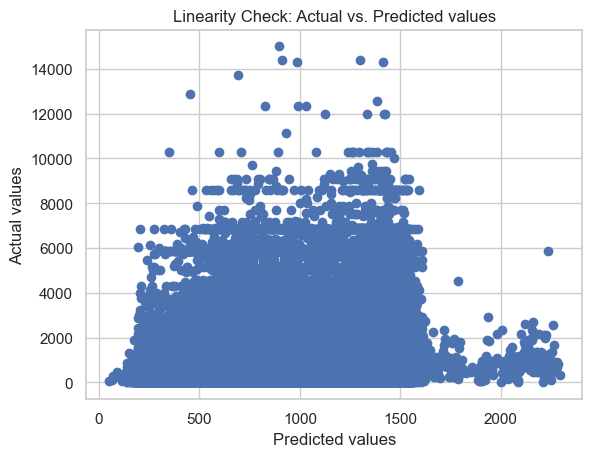

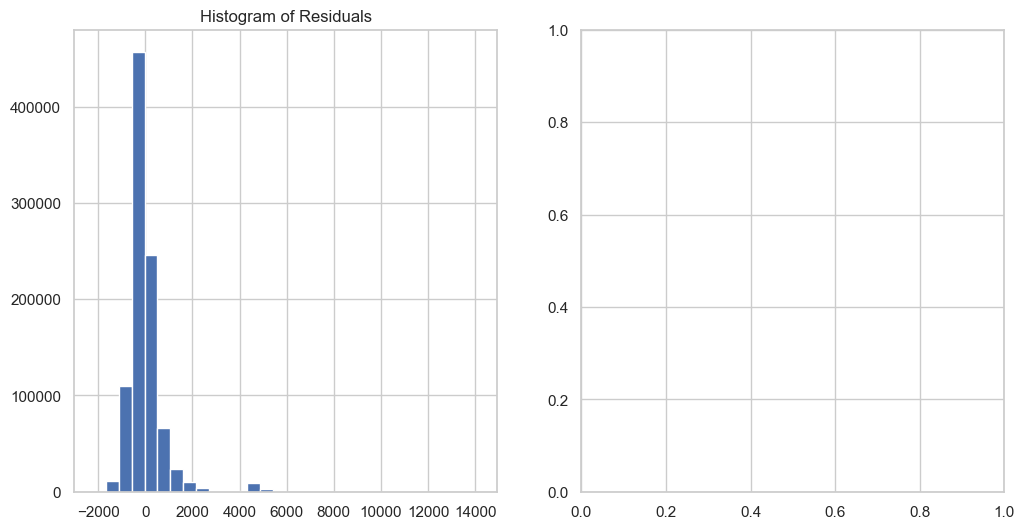

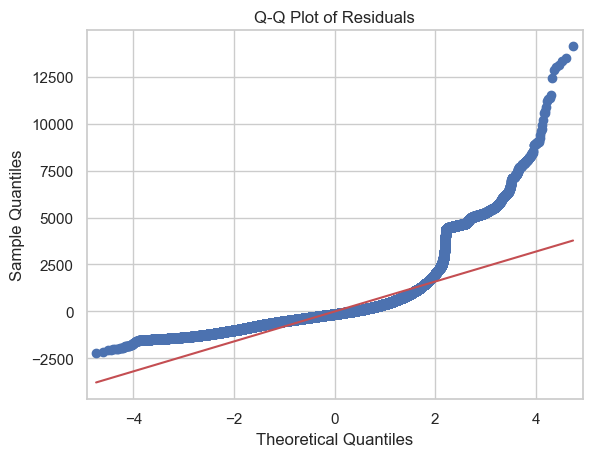

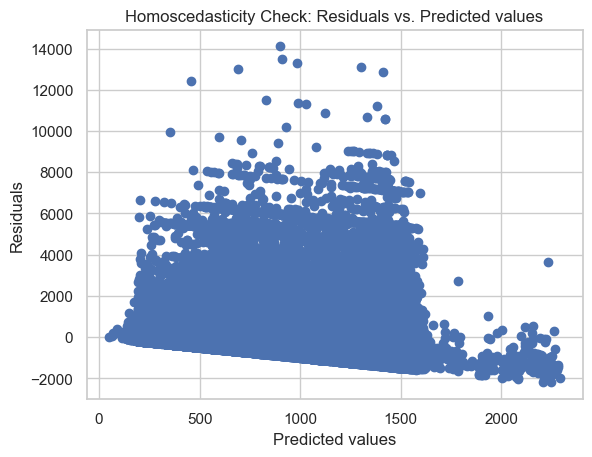

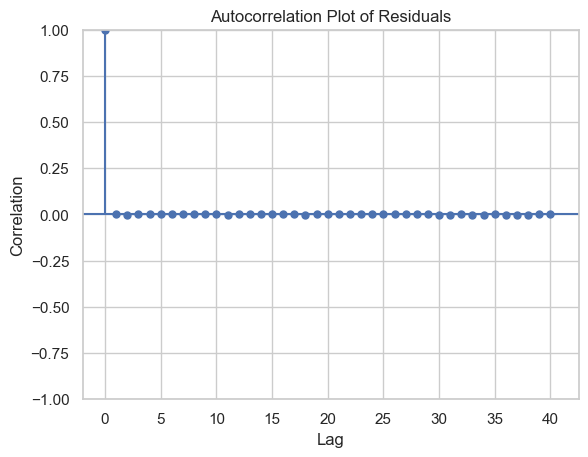

Breusch-Pagan test p-value: 0.0


In [60]:
# Hypothesis 4: Check assumptions and evaluate performance metrics
def hypothesis_4(X_train, X_test, y_train, y_test):
    # Add constant column to X_train and X_test
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Fit the linear regression model
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    
    # Get the residuals
    residuals = results.resid
    
    # Linearity: Plot actual vs. predicted values
    y_pred_train = results.predict(X_train)
    plt.scatter(y_pred_train, y_train)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title("Linearity Check: Actual vs. Predicted values")
    plt.show()
    
    # Normality of Residuals: Histogram and Q-Q plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=30)
    plt.title("Histogram of Residuals")
    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()
    
    # Homoscedasticity: Residuals vs. Predicted values
    plt.scatter(y_pred_train, residuals)
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.title("Homoscedasticity Check: Residuals vs. Predicted values")
    plt.show()
    
    # Independence of Residuals: Autocorrelation plot
    sm.graphics.tsa.plot_acf(residuals, lags=40)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.title("Autocorrelation Plot of Residuals")
    plt.show()
    
    # Breusch-Pagan test for Homoscedasticity
    bp_test = het_breuschpagan(residuals, X_train)
    print("Breusch-Pagan test p-value:", bp_test[1])
    
    # Evaluate performance metrics
    y_pred_test = results.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mape = calculate_mape(y_test, y_pred_test)
    
    return rmse, mse, r2, mape

# Run Hypothesis 2
rmse, mse, r2, mape = hypothesis_4(X_train, X_test, y_train, y_test)

In [61]:
# Hypothesis 5: Polynomial features for continuous features
def hypothesis_5(X_train, X_test, y_train, y_test):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    return hypothesis_1(X_train_poly, X_test_poly, y_train, y_test)

In [62]:
print("RMSE:", rmse)
print("MSE:", mse)
print("R2 Score:", r2)
print("MAPE:", mape)

RMSE: 793.0777045092614
MSE: 628972.2453896793
R2 Score: 0.1706472669022593
MAPE: 1.2789979745279139


In [63]:
# Run hypotheses and print results
hypotheses = {
    'Hypothesis 3': hypothesis_3,
    'Hypothesis 5': hypothesis_5
}

for name, hypothesis_func in hypotheses.items():
    print(f"Running {name}:")
    rmse, mse, r2, mape = hypothesis_func(X_train, X_test, y_train, y_test)
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("R2 Score:", r2)
    print("MAPE:", mape)
    print("-" * 50)

Running Hypothesis 3:
RMSE: 793.077704509261
MSE: 628972.2453896787
R2 Score: 0.17064726690226006
MAPE: 1.278997974527565
--------------------------------------------------
Running Hypothesis 5:
RMSE: 779.5713354082562
MSE: 607731.4669902119
R2 Score: 0.1986550172407623
MAPE: 1.164618879092848
--------------------------------------------------
